In [119]:
install.packages("tidyverse")
install.packages("quanteda")
install.packages("textclean")
install.packages("ggrepel")
install.packages("glmnet")

# Run these every time
library(tidyverse) # useful for almost everything
library(quanteda) # text analysis workhorse
library(textclean) # extra pre-processing
library(ggrepel) # for plots
library(glmnet) # Our estimation model


The downloaded binary packages are in
	/var/folders/by/g895l7l128j9y19qqn66xcxh0000gn/T//RtmpHriipr/downloaded_packages

The downloaded binary packages are in
	/var/folders/by/g895l7l128j9y19qqn66xcxh0000gn/T//RtmpHriipr/downloaded_packages

The downloaded binary packages are in
	/var/folders/by/g895l7l128j9y19qqn66xcxh0000gn/T//RtmpHriipr/downloaded_packages

The downloaded binary packages are in
	/var/folders/by/g895l7l128j9y19qqn66xcxh0000gn/T//RtmpHriipr/downloaded_packages

The downloaded binary packages are in
	/var/folders/by/g895l7l128j9y19qqn66xcxh0000gn/T//RtmpHriipr/downloaded_packages


## Pre-Processing Datasets

In [120]:
# Read csv files
week1_ivan<-read.csv("/Users/ivanhung/Documents/GitHub/text-mining/w1/m1/week1_ivan.csv")
week1_alavaro<-read.csv("/Users/ivanhung/Documents/GitHub/text-mining/w1/m1/week1_alavaro.csv")
week1_jin<-read.csv("/Users/ivanhung/Documents/GitHub/text-mining/w1/m1/week1_jin.csv")
week1_Yingxue<-read.csv("/Users/ivanhung/Documents/GitHub/text-mining/w1/m1/week1_Yingxue.csv")

In [121]:
# Make sure column names are correct
names(week1_ivan)
names(week1_alavaro)
names(week1_jin)
names(week1_Yingxue)

[1] "review_id"   "text"        "price_IVAN"  "gender_IVAN" "stars_IVAN"

[1] "review_id"     "text"          "price_alvaro"  "gender_alvaro"
[5] "stars_alvaro"

[1] "review_id"  "text"       "price_jin"  "gender_jin" "stars_jin"

[1] "review_id"      "text"           "price_Yingxue"  "gender_Yingxue"
[5] "stars_Yingxue"

In [122]:
# Make sure guesses are all filled in
table(week1_ivan$stars_IVAN,useNA="ifany")
table(week1_ivan$price_IVAN,useNA="ifany")
table(week1_ivan$gender_IVAN,useNA="ifany")

table(week1_alavaro$stars_alavaro,useNA="ifany")
table(week1_alavaro$price_alavaro,useNA="ifany")
table(week1_alavaro$gender_alavaro,useNA="ifany")

table(week1_jin$stars_jin,useNA="ifany")
table(week1_jin$price_jin,useNA="ifany")
table(week1_jin$gender_jin,useNA="ifany")

table(week1_Yingxue$stars_Yingxue,useNA="ifany")
table(week1_Yingxue$price_Yingxue,useNA="ifany")
table(week1_Yingxue$gender_Yingxue,useNA="ifany")


 1  2  3  4  5 
 2  9  7 11  3 


 1  2 
23  9 


female   male 
    16     16 

< table of extent 0 >

< table of extent 0 >

< table of extent 0 >


 2  4 
12 20 


 1  2 
22 10 


female   male 
    12     20 


 2  4 
16 16 


 1  2 
 7 25 


female   male 
    14     18 

In [123]:
# Left join combines two datasets at a time (same as in SQL)
week1 <- left_join(
  week1_ivan,
  week1_jin,
  by = c("review_id", "text")
) %>%
  left_join(
    week1_alavaro,
    by = c("review_id", "text")
  ) %>%
  left_join(
    week1_Yingxue,
    by = c("review_id", "text")
  )

names(week1)

[1] "review_id"      "text"           "price_IVAN"     "gender_IVAN"   
 [5] "stars_IVAN"     "price_jin"      "gender_jin"     "stars_jin"     
 [9] "price_alvaro"   "gender_alvaro"  "stars_alvaro"   "price_Yingxue" 
[13] "gender_Yingxue" "stars_Yingxue"

In [124]:
# Note - both the ID and the text columns are identical in these two datasets. 
# We don't want to duplicate the text column when you join!

week1 <- left_join(
  week1_ivan,
  week1_jin,
  by = "review_id"
) %>%
  left_join(
    week1_alavaro,
    by = "review_id"
  ) %>%
  left_join(
    week1_Yingxue,
    by = "review_id"
  )

names(week1)

[1] "review_id"      "text.x"         "price_IVAN"     "gender_IVAN"   
 [5] "stars_IVAN"     "text.y"         "price_jin"      "gender_jin"    
 [9] "stars_jin"      "text.x.x"       "price_alvaro"   "gender_alvaro" 
[13] "stars_alvaro"   "text.y.y"       "price_Yingxue"  "gender_Yingxue"
[17] "stars_Yingxue"

In [125]:
# Joining all the datasets together

week1_humans <- left_join(
  week1_ivan,
  week1_jin %>% select(-text),
  by = "review_id"
) %>%
  left_join(
    week1_alavaro %>% select(-text),
    by = "review_id"
  ) %>%
  left_join(
    week1_Yingxue %>% select(-text),
    by = "review_id"
  )

names(week1_humans)

[1] "review_id"      "text"           "price_IVAN"     "gender_IVAN"   
 [5] "stars_IVAN"     "price_jin"      "gender_jin"     "stars_jin"     
 [9] "price_alvaro"   "gender_alvaro"  "stars_alvaro"   "price_Yingxue" 
[13] "gender_Yingxue" "stars_Yingxue"

In [126]:
# Looking at the first few rows of our dataset, we still see that gender is still a char
# We should change it to numerical so that we can run analysis on this variable

# week1_humans %>%
#   head(2)

# Running as a tibble makes it easier to read
week1_humans %>%
  as_tibble() %>%
  head()

review_id,text,price_IVAN,gender_IVAN,stars_IVAN,price_jin,gender_jin,stars_jin,price_alvaro,gender_alvaro,stars_alvaro,price_Yingxue,gender_Yingxue,stars_Yingxue
<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",1,male,2,1,female,4,1,male,2,2,male,2
V7RTSW9nVIk6cI-Uqy0r9Q,"You do not go to the Greenhouse Coffee Shop expecting a gastronomical event. You go to the Greenhouse Coffee Shop for a delicious piece of chocolate cake and some coffee. You go expecting sticky tables and spots on your silverware. You eat your cake, you look out the window watching the brilliant mix of Harvard Squares and you eat your tight cake. Gary read a few things on poor service and Gary needs to speak out. The man who brought a delicious mountain of chocolate cake to Gary's table was probably the sweetest man ever. He was quick with coffee refills, made friendly banter, and even cut Gary a deal on the a la mode (sometimes you need a little something extra with your chocolate cake mountain). When asked about the location of the bathrooms, Gary will admit his chocolate cake smile turned momentarily into a frown. However, the waiter was quick to point out alternative bathroom locations thus turning Gary's frown right back upside down. As for the no credit issue? Gary burned off a whopping 3.4 chocolate cake calories jaunting to the ATM across the street and used the change to cart his bloated, sugar coma self back home in a taxi.",1,female,3,1,male,4,1,male,4,1,female,4
iLTXPskInwzcEoz0Wy6zig,"It is nothing short of a miracle if this place is open. My girlfriend loved the lentil soup she once had at this place. So we tried to visit this place at various times, and irrespective of when we went (believe me, we tried going at all kinds of times) - it used to be closed. Maybe they were renovating or something then - I dont know, whatever it was, it did not make great business sense. Anyway this once when we managed to find it open (we were really excited to go in, I remember), we had the lentil soup again (this time it was ok, clearly there is not much consistency in the cook's recipes). But should say that the food was not too bad. I think we had some veggie soup as well, and that was also not bad. 5/10 for the food, 0/10 for their hours.",1,male,1,2,female,2,1,male,2,2,male,2
NwzmjuZ16KjOXS8YJ-TBQg,"There are only 3 spaces in front for people like me who want to take their food to go but aren't lazy enough to go through the drive ""thru"". Of those 3 spaces, a manager-looking employee is parked in one - screwing over the customers. Big parking lot in back. Employees don't park in prime customer spaces! As for ordering, why do I have to recite my order to a guy who is pressing the same buttons I could press? Why not self serve registers? The guy fucjed up my order. I can do that myself and have no one to blame. Honestly, why hire people who can't understand English to speak English to people who are twice as intelligent as the guy fukcing up the order? Waste of a paycheck. They should all be cooking, prepping & serving not taking orders. GROCERY STORES HAVE SELF SERVE. WHY NOT HERE? AIRPORTS, PRINT YOUR OWN TICKET KIOSKS. Why create a faulted step between the customer and their order?????",1,male,2,2,male,2,1,male,2,2,male,2
3f7zOzoas29aWtEpZ91UPg,"I've eaten here before about four and a half years ago before I moved to Asia, and it wasn't bad. I remember the place being pretty good. I was thinking about taking the subway to the Theater District to P.F. Chang's for two orders of lettuce wraps, and I should have gone to P.F

In [127]:
# First, we want to see how consistent the raters are

# we use starts_with(). a "tidy select" command, to grab all the stars ratings
week1_humans %>%
  select(starts_with("stars"))

stars_IVAN,stars_jin,stars_alvaro,stars_Yingxue
<int>,<int>,<int>,<int>
2,4,2,2
3,4,4,4
1,2,2,2
2,2,2,2
3,2,2,2
2,4,2,2
2,4,2,2
1,2,2,2
4,2,4,4


In [128]:
# For stars
week1_humans %>%
  select(starts_with("stars")) %>%
  cor() %>%
  round(3)

# For price
week1_humans %>%
  select(starts_with("price")) %>%
  cor() %>%
  round(3)

# For gender - here, when we try and create a pairwise correlation matrix, we find 
# that gender is still a char, so we need to convert it into a float to form the matrix
week1_humans %>%
  select(starts_with("gender")) %>%
  cor() %>%
  round(3)

,stars_IVAN,stars_jin,stars_alvaro,stars_Yingxue
stars_IVAN,1.000,0.261,0.468,0.788
stars_jin,0.261,1.000,0.163,0.129
stars_alvaro,0.468,0.163,1.000,0.504
stars_Yingxue,0.788,0.129,0.504,1.000


,price_IVAN,price_jin,price_alvaro,price_Yingxue
price_IVAN,1.000,-0.122,0.441,0.331
price_jin,-0.122,1.000,-0.078,0.031
price_alvaro,0.441,-0.078,1.000,-0.044
price_Yingxue,0.331,0.031,-0.044,1.000


ERROR: Error in cor(.): 'x' must be numeric


In [129]:
# Converting gender from a char to a numerical variable 
# We should mutate to generate a new column for our numerical values for gender 

week1_humans<- week1_humans %>%
  mutate(newcol=3)

week1_humans %>%
as_tibble %>%
  head(2)

week1_humans %>%
  names()

review_id,text,price_IVAN,gender_IVAN,stars_IVAN,price_jin,gender_jin,stars_jin,price_alvaro,gender_alvaro,stars_alvaro,price_Yingxue,gender_Yingxue,stars_Yingxue,newcol
<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>,<dbl>
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",1,male,2,1,female,4,1,male,2,2,male,2,3
V7RTSW9nVIk6cI-Uqy0r9Q,"You do not go to the Greenhouse Coffee Shop expecting a gastronomical event. You go to the Greenhouse Coffee Shop for a delicious piece of chocolate cake and some coffee. You go expecting sticky tables and spots on your silverware. You eat your cake, you look out the window watching the brilliant mix of Harvard Squares and you eat your tight cake. Gary read a few things on poor service and Gary needs to speak out. The man who brought a delicious mountain of chocolate cake to Gary's table was probably the sweetest man ever. He was quick with coffee refills, made friendly banter, and even cut Gary a deal on the a la mode (sometimes you need a little something extra with your chocolate cake mountain). When asked about the location of the bathrooms, Gary will admit his chocolate cake smile turned momentarily into a frown. However, the waiter was quick to point out alternative bathroom locations thus turning Gary's frown right back upside down. As for the no credit issue? Gary burned off a whopping 3.4 chocolate cake calories jaunting to the ATM across the street and used the change to cart his bloated, sugar coma self back home in a taxi.",1,female,3,1,male,4,1,male,4,1,female,4,3


[1] "review_id"      "text"           "price_IVAN"     "gender_IVAN"   
 [5] "stars_IVAN"     "price_jin"      "gender_jin"     "stars_jin"     
 [9] "price_alvaro"   "gender_alvaro"  "stars_alvaro"   "price_Yingxue" 
[13] "gender_Yingxue" "stars_Yingxue"  "newcol"

In [130]:
#Let's get rid of the new column

week1_humans<- week1_humans %>%
  select(-newcol)

week1_humans %>%
  names()

[1] "review_id"      "text"           "price_IVAN"     "gender_IVAN"   
 [5] "stars_IVAN"     "price_jin"      "gender_jin"     "stars_jin"     
 [9] "price_alvaro"   "gender_alvaro"  "stars_alvaro"   "price_Yingxue" 
[13] "gender_Yingxue" "stars_Yingxue"

In [131]:
# Note: the ~ creates a "lambda function" - it is a quick way to create a short function
# In this case, the . represents the input to the function.
# It's shorthand for the following

addone<-function(x){
  x=x+1
  return(x)
}

week1_humans %>%
  mutate_at(vars(starts_with("stars")), addone) %>%
  head()

# We can also input the variable names into mutate_at directly, like this:
week1_humans %>%
  mutate_at(c("stars_IVAN","stars_jin","stars_alvaro","stars_Yingxue"),~.+1) %>%
  head()

# we could also select our columns first and then mutate_humans
week1_humans %>%
  select(starts_with("stars")) %>% # This is the same as SQL!
  mutate_all(~ .+1) %>% # Apply the same function to all columns which starts wth stars
  head()

,review_id,text,price_IVAN,gender_IVAN,stars_IVAN,price_jin,gender_jin,stars_jin,price_alvaro,gender_alvaro,stars_alvaro,price_Yingxue,gender_Yingxue,stars_Yingxue
,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>
1,XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",1,male,3,1,female,5,1,male,3,2,male,3
2,V7RTSW9nVIk6cI-Uqy0r9Q,"You do not go to the Greenhouse Coffee Shop expecting a gastronomical event. You go to the Greenhouse Coffee Shop for a delicious piece of chocolate cake and some coffee. You go expecting sticky tables and spots on your silverware. You eat your cake, you look out the window watching the brilliant mix of Harvard Squares and you eat your tight cake. Gary read a few things on poor service and Gary needs to speak out. The man who brought a delicious mountain of chocolate cake to Gary's table was probably the sweetest man ever. He was quick with coffee refills, made friendly banter, and even cut Gary a deal on the a la mode (sometimes you need a little something extra with your chocolate cake mountain). When asked about the location of the bathrooms, Gary will admit his chocolate cake smile turned momentarily into a frown. However, the waiter was quick to point out alternative bathroom locations thus turning Gary's frown right back upside down. As for the no credit issue? Gary burned off a whopping 3.4 chocolate cake calories jaunting to the ATM across the street and used the change to cart his bloated, sugar coma self back home in a taxi.",1,female,4,1,male,5,1,male,5,1,female,5
3,iLTXPskInwzcEoz0Wy6zig,"It is nothing short of a miracle if this place is open. My girlfriend loved the lentil soup she once had at this place. So we tried to visit this place at various times, and irrespective of when we went (believe me, we tried going at all kinds of times) - it used to be closed. Maybe they were renovating or something then - I dont know, whatever it was, it did not make great business sense. Anyway this once when we managed to find it open (we were really excited to go in, I remember), we had the lentil soup again (this time it was ok, clearly there is not much consistency in the cook's recipes). But should say that the food was not too bad. I think we had some veggie soup as well, and that was also not bad. 5/10 for the food, 0/10 for their hours.",1,male,2,2,female,3,1,male,3,2,male,3
4,NwzmjuZ16KjOXS8YJ-TBQg,"There are only 3 spaces in front for people like me who want to take their food to go but aren't lazy enough to go through the drive ""thru"". Of those 3 spaces, a manager-looking employee is parked in one - screwing over the customers. Big parking lot in back. Employees don't park in prime customer spaces! As for ordering, why do I have to recite my order to a guy who is pressing the same buttons I could press? Why not self serve registers? The guy fucjed up my order. I can do that myself and have no one to blame. Honestly, why hire people who can't understand English to speak English to people who are twice as intelligent as the guy fukcing up the order? Waste of a paycheck. They should all be cooking, prepping & serving not taking orders. GROCERY STORES HAVE SELF SERVE. WHY NOT HERE? AIRPORTS, PRINT YOUR OWN TICKET KIOSKS. Why create a faulted step between the customer and their order?????",1,male,3,2,male,3,1,male,3,2,male,3
5,3f7zOzoas29aWtEpZ91UPg,"I've eaten here before about four and a half years ago before I moved to Asia, and it wasn't bad. I remember the place being pretty good. I was thinking about taking the subway to the Theater District to P.F. Chang's for two orders of lettuce wraps, and I should have

,review_id,text,price_IVAN,gender_IVAN,stars_IVAN,price_jin,gender_jin,stars_jin,price_alvaro,gender_alvaro,stars_alvaro,price_Yingxue,gender_Yingxue,stars_Yingxue
,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>
1,XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",1,male,3,1,female,5,1,male,3,2,male,3
2,V7RTSW9nVIk6cI-Uqy0r9Q,"You do not go to the Greenhouse Coffee Shop expecting a gastronomical event. You go to the Greenhouse Coffee Shop for a delicious piece of chocolate cake and some coffee. You go expecting sticky tables and spots on your silverware. You eat your cake, you look out the window watching the brilliant mix of Harvard Squares and you eat your tight cake. Gary read a few things on poor service and Gary needs to speak out. The man who brought a delicious mountain of chocolate cake to Gary's table was probably the sweetest man ever. He was quick with coffee refills, made friendly banter, and even cut Gary a deal on the a la mode (sometimes you need a little something extra with your chocolate cake mountain). When asked about the location of the bathrooms, Gary will admit his chocolate cake smile turned momentarily into a frown. However, the waiter was quick to point out alternative bathroom locations thus turning Gary's frown right back upside down. As for the no credit issue? Gary burned off a whopping 3.4 chocolate cake calories jaunting to the ATM across the street and used the change to cart his bloated, sugar coma self back home in a taxi.",1,female,4,1,male,5,1,male,5,1,female,5
3,iLTXPskInwzcEoz0Wy6zig,"It is nothing short of a miracle if this place is open. My girlfriend loved the lentil soup she once had at this place. So we tried to visit this place at various times, and irrespective of when we went (believe me, we tried going at all kinds of times) - it used to be closed. Maybe they were renovating or something then - I dont know, whatever it was, it did not make great business sense. Anyway this once when we managed to find it open (we were really excited to go in, I remember), we had the lentil soup again (this time it was ok, clearly there is not much consistency in the cook's recipes). But should say that the food was not too bad. I think we had some veggie soup as well, and that was also not bad. 5/10 for the food, 0/10 for their hours.",1,male,2,2,female,3,1,male,3,2,male,3
4,NwzmjuZ16KjOXS8YJ-TBQg,"There are only 3 spaces in front for people like me who want to take their food to go but aren't lazy enough to go through the drive ""thru"". Of those 3 spaces, a manager-looking employee is parked in one - screwing over the customers. Big parking lot in back. Employees don't park in prime customer spaces! As for ordering, why do I have to recite my order to a guy who is pressing the same buttons I could press? Why not self serve registers? The guy fucjed up my order. I can do that myself and have no one to blame. Honestly, why hire people who can't understand English to speak English to people who are twice as intelligent as the guy fukcing up the order? Waste of a paycheck. They should all be cooking, prepping & serving not taking orders. GROCERY STORES HAVE SELF SERVE. WHY NOT HERE? AIRPORTS, PRINT YOUR OWN TICKET KIOSKS. Why create a faulted step between the customer and their order?????",1,male,3,2,male,3,1,male,3,2,male,3
5,3f7zOzoas29aWtEpZ91UPg,"I've eaten here before about four and a half years ago before I moved to Asia, and it wasn't bad. I remember the place being pretty good. I was thinking about taking the subway to the Theater District to P.F. Chang's for two orders of lettuce wraps, and I should have

,stars_IVAN,stars_jin,stars_alvaro,stars_Yingxue
,<dbl>,<dbl>,<dbl>,<dbl>
1,3,5,3,3
2,4,5,5,5
3,2,3,3,3
4,3,3,3,3
5,4,3,3,3
6,3,5,3,3


In this context, the transformation applied to the `stars_*` columns (adding 1) is not substantively meaningful and is used purely for illustration. The purpose of this example is to demonstrate how functions such as `mutate_at()` (or, more generally, `mutate(across())`) allow the same transformation to be applied efficiently across multiple columns at once. This is particularly useful in large datasets where many variables share the same structure and require identical preprocessing steps, such as rescaling scores, standardising variables, handling missing values, or converting data types. Rather than repeating the same mutation for each column individually, this approach improves code readability, reduces redundancy, and minimises the risk of errors.

In [132]:
# Transforming gender to numeric

# For more complex transformations you can use ifelse

week1_humans %>%
  mutate_at(vars(starts_with("gender")),~ifelse(.=="male",1,0)) %>%
  head()

week1_humans %>%
  mutate_at(vars(starts_with("gender")),~ifelse(.=="male","one","zero")) %>%
  head()


,review_id,text,price_IVAN,gender_IVAN,stars_IVAN,price_jin,gender_jin,stars_jin,price_alvaro,gender_alvaro,stars_alvaro,price_Yingxue,gender_Yingxue,stars_Yingxue
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>
1,XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",1,1,2,1,0,4,1,1,2,2,1,2
2,V7RTSW9nVIk6cI-Uqy0r9Q,"You do not go to the Greenhouse Coffee Shop expecting a gastronomical event. You go to the Greenhouse Coffee Shop for a delicious piece of chocolate cake and some coffee. You go expecting sticky tables and spots on your silverware. You eat your cake, you look out the window watching the brilliant mix of Harvard Squares and you eat your tight cake. Gary read a few things on poor service and Gary needs to speak out. The man who brought a delicious mountain of chocolate cake to Gary's table was probably the sweetest man ever. He was quick with coffee refills, made friendly banter, and even cut Gary a deal on the a la mode (sometimes you need a little something extra with your chocolate cake mountain). When asked about the location of the bathrooms, Gary will admit his chocolate cake smile turned momentarily into a frown. However, the waiter was quick to point out alternative bathroom locations thus turning Gary's frown right back upside down. As for the no credit issue? Gary burned off a whopping 3.4 chocolate cake calories jaunting to the ATM across the street and used the change to cart his bloated, sugar coma self back home in a taxi.",1,0,3,1,1,4,1,1,4,1,0,4
3,iLTXPskInwzcEoz0Wy6zig,"It is nothing short of a miracle if this place is open. My girlfriend loved the lentil soup she once had at this place. So we tried to visit this place at various times, and irrespective of when we went (believe me, we tried going at all kinds of times) - it used to be closed. Maybe they were renovating or something then - I dont know, whatever it was, it did not make great business sense. Anyway this once when we managed to find it open (we were really excited to go in, I remember), we had the lentil soup again (this time it was ok, clearly there is not much consistency in the cook's recipes). But should say that the food was not too bad. I think we had some veggie soup as well, and that was also not bad. 5/10 for the food, 0/10 for their hours.",1,1,1,2,0,2,1,1,2,2,1,2
4,NwzmjuZ16KjOXS8YJ-TBQg,"There are only 3 spaces in front for people like me who want to take their food to go but aren't lazy enough to go through the drive ""thru"". Of those 3 spaces, a manager-looking employee is parked in one - screwing over the customers. Big parking lot in back. Employees don't park in prime customer spaces! As for ordering, why do I have to recite my order to a guy who is pressing the same buttons I could press? Why not self serve registers? The guy fucjed up my order. I can do that myself and have no one to blame. Honestly, why hire people who can't understand English to speak English to people who are twice as intelligent as the guy fukcing up the order? Waste of a paycheck. They should all be cooking, prepping & serving not taking orders. GROCERY STORES HAVE SELF SERVE. WHY NOT HERE? AIRPORTS, PRINT YOUR OWN TICKET KIOSKS. Why create a faulted step between the customer and their order?????",1,1,2,2,1,2,1,1,2,2,1,2
5,3f7zOzoas29aWtEpZ91UPg,"I've eaten here before about four and a half years ago before I moved to Asia, and it wasn't bad. I remember the place being pretty good. I was thinking about taking the subway to the Theater District to P.F. Chang's for two orders of lettuce wraps, and I should have gone to P.F. Changs. Anyway, it has the typical Sports 

,review_id,text,price_IVAN,gender_IVAN,stars_IVAN,price_jin,gender_jin,stars_jin,price_alvaro,gender_alvaro,stars_alvaro,price_Yingxue,gender_Yingxue,stars_Yingxue
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>
1,XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",1,one,2,1,zero,4,1,one,2,2,one,2
2,V7RTSW9nVIk6cI-Uqy0r9Q,"You do not go to the Greenhouse Coffee Shop expecting a gastronomical event. You go to the Greenhouse Coffee Shop for a delicious piece of chocolate cake and some coffee. You go expecting sticky tables and spots on your silverware. You eat your cake, you look out the window watching the brilliant mix of Harvard Squares and you eat your tight cake. Gary read a few things on poor service and Gary needs to speak out. The man who brought a delicious mountain of chocolate cake to Gary's table was probably the sweetest man ever. He was quick with coffee refills, made friendly banter, and even cut Gary a deal on the a la mode (sometimes you need a little something extra with your chocolate cake mountain). When asked about the location of the bathrooms, Gary will admit his chocolate cake smile turned momentarily into a frown. However, the waiter was quick to point out alternative bathroom locations thus turning Gary's frown right back upside down. As for the no credit issue? Gary burned off a whopping 3.4 chocolate cake calories jaunting to the ATM across the street and used the change to cart his bloated, sugar coma self back home in a taxi.",1,zero,3,1,one,4,1,one,4,1,zero,4
3,iLTXPskInwzcEoz0Wy6zig,"It is nothing short of a miracle if this place is open. My girlfriend loved the lentil soup she once had at this place. So we tried to visit this place at various times, and irrespective of when we went (believe me, we tried going at all kinds of times) - it used to be closed. Maybe they were renovating or something then - I dont know, whatever it was, it did not make great business sense. Anyway this once when we managed to find it open (we were really excited to go in, I remember), we had the lentil soup again (this time it was ok, clearly there is not much consistency in the cook's recipes). But should say that the food was not too bad. I think we had some veggie soup as well, and that was also not bad. 5/10 for the food, 0/10 for their hours.",1,one,1,2,zero,2,1,one,2,2,one,2
4,NwzmjuZ16KjOXS8YJ-TBQg,"There are only 3 spaces in front for people like me who want to take their food to go but aren't lazy enough to go through the drive ""thru"". Of those 3 spaces, a manager-looking employee is parked in one - screwing over the customers. Big parking lot in back. Employees don't park in prime customer spaces! As for ordering, why do I have to recite my order to a guy who is pressing the same buttons I could press? Why not self serve registers? The guy fucjed up my order. I can do that myself and have no one to blame. Honestly, why hire people who can't understand English to speak English to people who are twice as intelligent as the guy fukcing up the order? Waste of a paycheck. They should all be cooking, prepping & serving not taking orders. GROCERY STORES HAVE SELF SERVE. WHY NOT HERE? AIRPORTS, PRINT YOUR OWN TICKET KIOSKS. Why create a faulted step between the customer and their order?????",1,one,2,2,one,2,1,one,2,2,one,2
5,3f7zOzoas29aWtEpZ91UPg,"I've eaten here before about four and a half years ago before I moved to Asia, and it wasn't bad. I remember the place being pretty good. I was thinking about taking the subway to the Theater District to P.F. Chang's for two orders of lettuce wraps, and I should have gone to P.F. Changs

In [133]:
# Convert numeric to binary 
week1_humans<-week1_humans %>%
  mutate_at(vars(starts_with("gender")),~ifelse(.=="male",1,0))

# Compute correlation
week1_humans %>%
  select(starts_with("gender")) %>%
  cor() %>%
  round(3)

,gender_IVAN,gender_jin,gender_alvaro,gender_Yingxue
gender_IVAN,1.000,0.000,-0.063,0.252
gender_jin,0.000,1.000,-0.081,-0.163
gender_alvaro,-0.063,-0.081,1.000,0.434
gender_Yingxue,0.252,-0.163,0.434,1.000


In [134]:
# Correlations give us "pairwise" summary statistics. What if we want to 
# Summarise more than two columns? We calculate "Cronbach's alpha"

# We need the psych package - run this installation once
install.packages("psych")

# Load the package every time you open R
library(psych)


The downloaded binary packages are in
	/var/folders/by/g895l7l128j9y19qqn66xcxh0000gn/T//RtmpHriipr/downloaded_packages


In [135]:
# We want the raw alpha, but this doesn't work...
week1_humans %>%
  select(starts_with("gender")) %>%
  alpha()

Warning message in alpha(.):
“Some items were negatively correlated with the first principal component and probably 
should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option”


Some items ( gender_jin ) were negatively correlated with the first principal component and 
probably should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option


Reliability analysis   
Call: alpha(x = .)

  raw_alpha std.alpha G6(smc) average_r  S/N  ase mean   sd median_r
      0.22      0.21    0.29     0.063 0.27 0.23 0.55 0.27   -0.031

    95% confidence boundaries 
         lower alpha upper
Feldt    -0.34  0.22  0.58
Duhachek -0.22  0.22  0.66

 Reliability if an item is dropped:
               raw_alpha std.alpha G6(smc) average_r    S/N alpha se  var.r
gender_IVAN         0.18     0.169   0.237     0.063  0.203     0.25 0.1046
gender_jin          0.44     0.440   0.432     0.208  0.787     0.17 0.0631
gender_alvaro       0.09     0.084   0.114     0.030  0.092     0.28 0.0436
gender_Yingxue     -0.16    -0.159  -0.098    -0.048 -0.137     0.35 0.0018
                med.r
gender_IVAN    -0.081
gender_jin      0.252
gender_alvaro   0.000
gender_Yingxue -0.063

 Item statistics 
                n raw.r std.r r.cor r.drop mean   sd
gender_IVAN    32  0.55  0.55  0.25   0.10 0.50 0.51
gender_jin     32  0.34  0.35 -0.18  -0.12 0.62 0.49


It doesn’t work because alpha() is not a tidyverse function and it doesn’t accept a tibble/data frame in the way dplyr pipes pass it.

More specifically:
- alpha() (from the psych package) expects:
- a numeric matrix or data frame
- with no non-numeric columns
- select(starts_with("gender")) returns a tibble
- alpha() does not play nicely with tibbles

In [136]:
#| warning: false
# We could do this, and use the function version of $ which looks like `$`()

# week1_humans %>%
#   select(starts_with("gender")) %>%
#   alpha() %>%
#   `$`(total)

# More commonly, we use with() as it is more efficient and easier to call (less clunky)
# with() allows us to refer to the input inside the parens using a .
week1_humans %>%
  select(starts_with("gender")) %>%
  alpha() %>%
  with(.$total)


Warning message in alpha(.):
“Some items were negatively correlated with the first principal component and probably 
should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option”


Some items ( gender_jin ) were negatively correlated with the first principal component and 
probably should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option

,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,0.2179594,0.2127869,0.2924082,0.06329855,0.2703041,0.2250641,0.5546875,0.2748487,-0.03131121


### Key differences summarised

| Aspect | `$` | `with()` |
|------|-----|----------|
| Primary purpose | Extract one component | Evaluate expressions inside object |
| Typical use | Simple access | More complex expressions |
| Verbosity | Minimal | Slightly more |
| Pipe friendliness | Good | Good |


In [137]:
# Before we join this to the correct answers, we need one more new concept - pivoting to long format

week1_long <- week1_humans %>%
  pivot_longer(-c(text,review_id),names_to="question",values_to="guess")

dim(week1_long) # 288 = 9x32 = 9 guesses for each of 32 texts

# the "question" column contains two bits of info - the question and the annotator
head(week1_long)

[1] 384   4

review_id,text,question,guess
<chr>,<chr>,<chr>,<dbl>
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",price_IVAN,1
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",gender_IVAN,1
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",stars_IVAN,2
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",price_jin,1
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",gender_jin,0
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",stars_jin,4


In [138]:
# Lets split them into two separate columns
week1_long <- week1_long %>%
  separate(question,into=c("metric","annotator"),sep="_")

head(week1_long)

review_id,text,metric,annotator,guess
<chr>,<chr>,<chr>,<chr>,<dbl>
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",price,IVAN,1
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",gender,IVAN,1
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",stars,IVAN,2
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",price,jin,1
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",gender,jin,0
XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",stars,jin,4


In [139]:
# checking that everything worked - we have 32 observations 
# for every combination of metric and annotator
week1_long %>%
  with(table(metric,annotator))

        annotator
metric   alvaro IVAN jin Yingxue
  gender     32   32  32      32
  price      32   32  32      32
  stars      32   32  32      32

## Bringing in Correct Answers

In [202]:
# Bring in the correct answers (the actual stars and responses from the reviews)
week1_answers=read.csv("/Users/ivanhung/Documents/GitHub/text-mining/w1/m1/week1_answers.csv")

head(week1_answers, 2)

,review_id,text,priceTRUE,genderTRUE,starsTRUE
,<chr>,<chr>,<int>,<chr>,<int>
1,XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",1,male,2
2,V7RTSW9nVIk6cI-Uqy0r9Q,"You do not go to the Greenhouse Coffee Shop expecting a gastronomical event. You go to the Greenhouse Coffee Shop for a delicious piece of chocolate cake and some coffee. You go expecting sticky tables and spots on your silverware. You eat your cake, you look out the window watching the brilliant mix of Harvard Squares and you eat your tight cake. Gary read a few things on poor service and Gary needs to speak out. The man who brought a delicious mountain of chocolate cake to Gary's table was probably the sweetest man ever. He was quick with coffee refills, made friendly banter, and even cut Gary a deal on the a la mode (sometimes you need a little something extra with your chocolate cake mountain). When asked about the location of the bathrooms, Gary will admit his chocolate cake smile turned momentarily into a frown. However, the waiter was quick to point out alternative bathroom locations thus turning Gary's frown right back upside down. As for the no credit issue? Gary burned off a whopping 3.4 chocolate cake calories jaunting to the ATM across the street and used the change to cart his bloated, sugar coma self back home in a taxi.",1,male,2


In [203]:
# Remove the "TRUE" suffix from column names
week1_answers <- week1_answers %>%
  rename_all(~str_replace(., "TRUE", ""))

In [204]:
# Let's do the same pivot as before so that both datasets are in the same format

week1_answers_long <- week1_answers %>%
  pivot_longer(-c(text,review_id),names_to="metric",values_to="answer")

# check to make sure the metric names match
table(week1_answers_long$metric)

# As before, let's left_join them
week1_all <- left_join(week1_long,
                       week1_answers_long %>%
                         select(-text),
                       by=c("review_id","metric"))

ERROR: [1m[33mError[39m in `pivot_longer()`:[22m
[33m![39m Can't combine `price` <integer> and `gender` <character>.


In [205]:
week1_answers %>%
  select(-text, -review_id) %>%
  summarise(across(everything(), ~ paste(class(.), collapse = "/")))

# Convert numeric to binary 
week1_answers<-week1_answers %>%
  mutate_at(vars(starts_with("gender")),~ifelse(.=="male",1,0))

head(week1_answers, 2)

price,gender,stars
<chr>,<chr>,<chr>
integer,character,integer


,review_id,text,price,gender,stars
,<chr>,<chr>,<int>,<dbl>,<int>
1,XxRfwkKi-FjwM8qsbXVNbw,"The only reason why I sometimes end up here is because there are not really that many alternatives in the vicinity (Dunkin' Donuts is not doing it for me) -- but I always regret having eaten unhealthy fastfood the moment I exit the restaurant. Next time, I'll better go to Star Market next door, buy some food, and prepare it myself. Or avoid this area around lunchtime altogether.",1,1,2
2,V7RTSW9nVIk6cI-Uqy0r9Q,"You do not go to the Greenhouse Coffee Shop expecting a gastronomical event. You go to the Greenhouse Coffee Shop for a delicious piece of chocolate cake and some coffee. You go expecting sticky tables and spots on your silverware. You eat your cake, you look out the window watching the brilliant mix of Harvard Squares and you eat your tight cake. Gary read a few things on poor service and Gary needs to speak out. The man who brought a delicious mountain of chocolate cake to Gary's table was probably the sweetest man ever. He was quick with coffee refills, made friendly banter, and even cut Gary a deal on the a la mode (sometimes you need a little something extra with your chocolate cake mountain). When asked about the location of the bathrooms, Gary will admit his chocolate cake smile turned momentarily into a frown. However, the waiter was quick to point out alternative bathroom locations thus turning Gary's frown right back upside down. As for the no credit issue? Gary burned off a whopping 3.4 chocolate cake calories jaunting to the ATM across the street and used the change to cart his bloated, sugar coma self back home in a taxi.",1,1,2


In [206]:
# Let's do the same pivot as before so that both datasets are in the same format

week1_answers_long <- week1_answers %>%
  pivot_longer(-c(text,review_id),names_to="metric",values_to="answer")

# check to make sure the metric names match
table(week1_answers_long$metric)

# As before, let's left_join them
week1_all <- left_join(week1_long,
                       week1_answers_long %>%
                         select(-text),
                       by=c("review_id","metric"))


gender  price  stars 
    32     32     32 

In [207]:
# Try converting both to character before comparing
week1_all <- week1_all %>%
  mutate(correct=1*(as.character(guess)==as.character(answer)))

print(paste0("Mean Accuracy Score is: ", 
             mean(week1_all$correct, na.rm = TRUE)))

[1] "Mean Accuracy Score is: 0.639784946236559"


In [208]:
week1_all %>%
  group_by(metric) %>%
  summarize(acc=mean(correct, na.rm=TRUE))

week1_all %>%
  group_by(annotator) %>%
  summarize(acc=mean(correct, na.rm=TRUE))

metric,acc
<chr>,<dbl>
gender,0.6209677
price,0.5806452
stars,0.7177419


annotator,acc
<chr>,<dbl>
IVAN,0.6451613
Yingxue,0.7311828
alvaro,0.7311828
jin,0.4516129


In [209]:
acc_report<-week1_all %>%
  group_by(annotator) %>%
  summarize(acc=mean(correct, na.rm=TRUE),
            se=sqrt(mean(correct, na.rm=TRUE)*(1-mean(correct, na.rm=TRUE))/n()))

print(acc_report)

# A tibble: 4 × 3
  annotator   acc     se
  <chr>     <dbl>  <dbl>
1 IVAN      0.645 0.0488
2 Yingxue   0.731 0.0452
3 alvaro    0.731 0.0452
4 jin       0.452 0.0508


In [210]:
# One last thing - we want percentages so let's multiple everything by 100

acc_report <- acc_report %>%
  mutate_at(c("acc","se"),~.*100)

print(acc_report)

# A tibble: 4 × 3
  annotator   acc    se
  <chr>     <dbl> <dbl>
1 IVAN       64.5  4.88
2 Yingxue    73.1  4.52
3 alvaro     73.1  4.52
4 jin        45.2  5.08


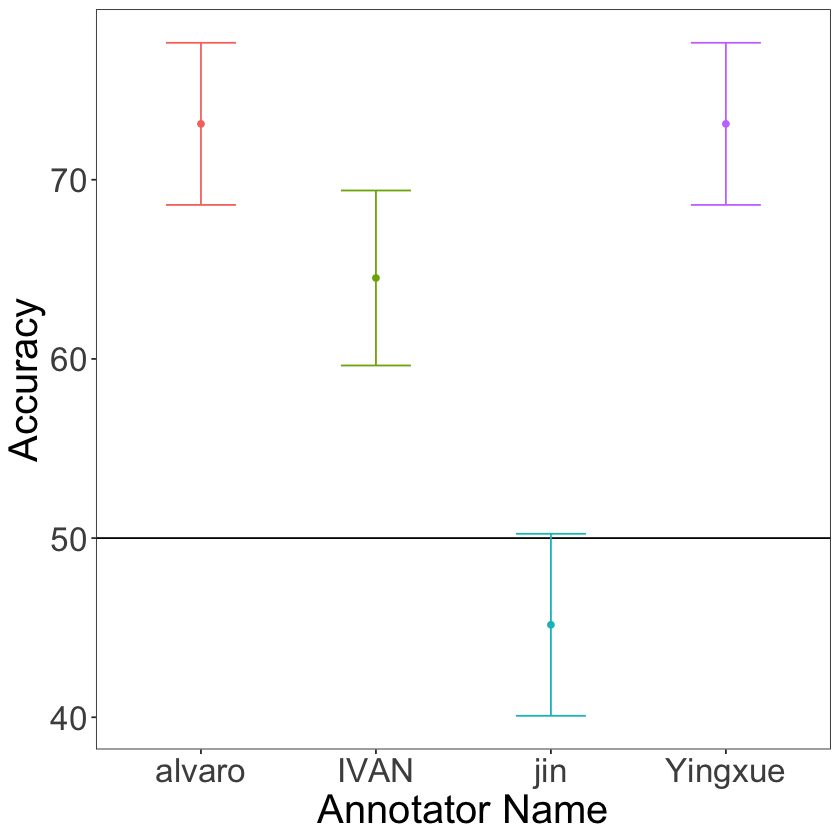

In [212]:
# Tables are fun, but graphs are even more fun! Let's use ggplot
# We will work with ggplot a lot! 

# First we create a plot using ggplot() that contains aes() - short for "aesthetic"
# aes() will let us assign data columns to different aspects of the plot
# We then add layers to the plot with functions (note: we chain with +, not %>%)

acc_report %>% 
  ggplot(aes(x=annotator,color=annotator,
             y=acc,ymin=acc-se,ymax=acc+se)) +
  geom_hline(yintercept=50) +              # Adds baseline at 50%
  geom_point() +                           # adds points to the plot
  geom_errorbar(width=.4) +                # adds error bars
  labs(x="Annotator Name",                
       y="Accuracy") +                     
  theme_bw() +                             # changes the color scheme
  theme(axis.text=element_text(size=20),
        axis.title=element_text(size=24),
        panel.grid = element_blank(),
        legend.position = "none") # other design options


In [213]:
##### Let's do this all again, but separate the metrics as well

acc_report<-week1_all %>%
  group_by(annotator,metric) %>%
  summarize(acc=mean(correct, na.rm=TRUE),
            se=sqrt(mean(correct, na.rm=TRUE)*(1-mean(correct, na.rm=TRUE))/n())) %>%
  mutate_at(c("acc","se"),~.*100)

print(acc_report)

`summarise()` has grouped output by 'annotator'. You can override using the
`.groups` argument.


# A tibble: 12 × 4
# Groups:   annotator [4]
   annotator metric   acc    se
   <chr>     <chr>  <dbl> <dbl>
 1 IVAN      gender  58.1  8.72
 2 IVAN      price   74.2  7.74
 3 IVAN      stars   61.3  8.61
 4 Yingxue   gender  71.0  8.02
 5 Yingxue   price   54.8  8.80
 6 Yingxue   stars   93.5  4.34
 7 alvaro    gender  74.2  7.74
 8 alvaro    price   67.7  8.26
 9 alvaro    stars   77.4  7.39
10 jin       gender  45.2  8.80
11 jin       price   35.5  8.46
12 jin       stars   54.8  8.80


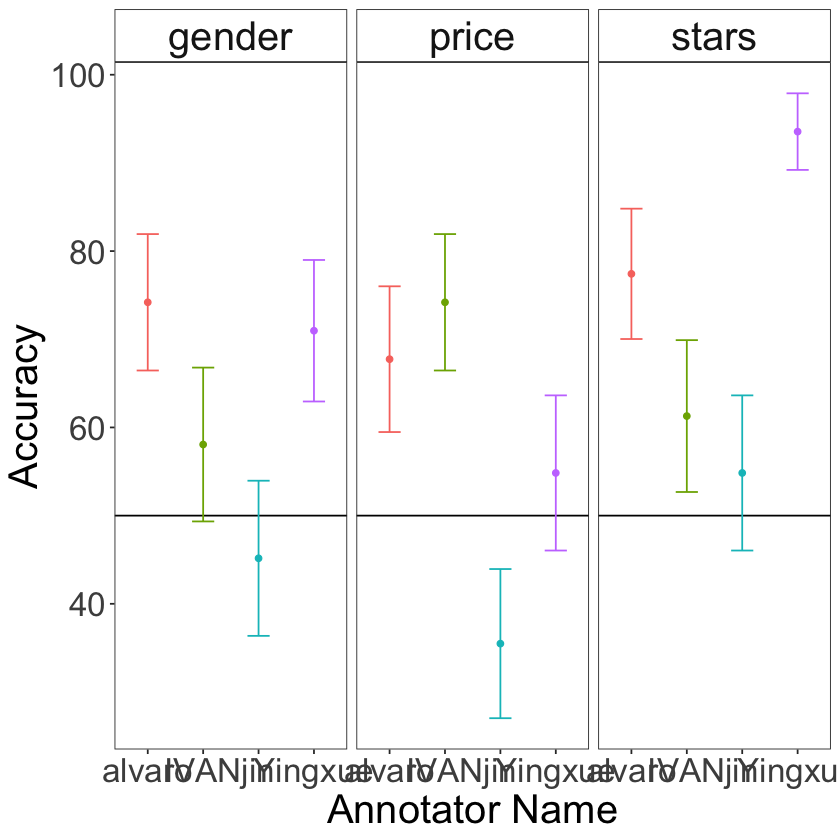

In [214]:
acc_report %>% 
  ggplot(aes(x=annotator,color=annotator,
             y=acc,ymin=acc-se,ymax=acc+se)) +
  geom_hline(yintercept=50) +              # Adds baseline at 50%
  facet_wrap(~metric) +                    # splits plot into separate "facets"
  geom_point() +                           # adds points to the plot
  geom_errorbar(width=.4) +                # adds error bars
  labs(x="Annotator Name",                 # changes axis labels
       y="Accuracy") +                     
  theme_bw() +                             # changes the color scheme
  theme(axis.text=element_text(size=20),
        axis.title=element_text(size=24),
        panel.grid = element_blank(),
        strip.text=element_text(size=24),
        strip.background = element_rect(fill="white"),
        legend.position = "none")          # other design options

# Finally, let's save this plot

ggsave("week1.png", width = 30, height = 10, dpi = 400)

## Building NLP Model

In [216]:
######### Simple bag of words

testDocs<-c("This is a test sentence.", 
            "I am providing another sentence to test this.",
            "This isn't a sentence",
            "This is a test document. It has 2 sentences")

# First we need to split up the sentences into "tokens" - (usually words)

testDocs %>%
  tokens() # a command from quanteda package 

Tokens consisting of 4 documents.
text1 :
[1] "This"     "is"       "a"        "test"     "sentence" "."       

text2 :
[1] "I"         "am"        "providing" "another"   "sentence"  "to"       
[7] "test"      "this"      "."        

text3 :
[1] "This"     "isn't"    "a"        "sentence"

text4 :
 [1] "This"      "is"        "a"         "test"      "document"  "."        
 [7] "It"        "has"       "2"         "sentences"


In [217]:
# We then count how often each token occurs in each document 
# This produces a "document feature matrix" (or document term matrix)
# One row for each doc, one column for each feature
testDocs %>%
  tokens() %>%
  dfm()

Document-feature matrix of: 4 documents, 17 features (57.35% sparse) and 0 docvars.
       features
docs    this is a test sentence . i am providing another
  text1    1  1 1    1        1 1 0  0         0       0
  text2    1  0 0    1        1 1 1  1         1       1
  text3    1  0 1    0        1 0 0  0         0       0
  text4    1  1 1    1        0 1 0  0         0       0
[ reached max_nfeat ... 7 more features ]

In [219]:
# We can also combine adjoining words into "bigrams"

testDocs %>%
  tokens() %>%
  tokens_ngrams(2) %>%
  dfm()

Document-feature matrix of: 4 documents, 22 features (71.59% sparse) and 0 docvars.
       features
docs    this_is is_a a_test test_sentence sentence_. i_am am_providing
  text1       1    1      1             1          1    0            0
  text2       0    0      0             0          0    1            1
  text3       0    0      0             0          0    0            0
  text4       1    1      1             0          0    0            0
       features
docs    providing_another another_sentence sentence_to
  text1                 0                0           0
  text2                 1                1           1
  text3                 0                0           0
  text4                 0                0           0
[ reached max_nfeat ... 12 more features ]

In [221]:
# Often people combine multiple token lengths together, as ngrams
testDocs %>%
  tokens() %>%
  tokens_ngrams(1:2) %>%
  dfm()

Document-feature matrix of: 4 documents, 39 features (65.38% sparse) and 0 docvars.
       features
docs    this is a test sentence . this_is is_a a_test test_sentence
  text1    1  1 1    1        1 1       1    1      1             1
  text2    1  0 0    1        1 1       0    0      0             0
  text3    1  0 1    0        1 0       0    0      0             0
  text4    1  1 1    1        0 1       1    1      1             0
[ reached max_nfeat ... 29 more features ]

In [222]:
# Many different ways to tokenize - see the help file for options

?tokens

tokens                package:quanteda                 R Documentation

_C_o_n_s_t_r_u_c_t _a _t_o_k_e_n_s _o_b_j_e_c_t

_D_e_s_c_r_i_p_t_i_o_n:

     Construct a tokens object, either by importing a named list of
     characters from an external tokenizer, or by calling the internal
     ‘quanteda’ tokenizer.

     ‘tokens()’ can also be applied to tokens class objects, which
     means that the removal rules can be applied post-tokenization,
     although it should be noted that it will not be possible to remove
     things that are not present.  For instance, if the ‘tokens’ object
     has already had punctuation removed, then ‘tokens(x, remove_punct
     = TRUE)’ will have no additional effect.

_U_s_a_g_e:

     tokens(
       x,
       what = "word",
       remove_punct = FALSE,
       remove_symbols = FALSE,
       remove_numbers = FALSE,
       remove_url = FALSE,
       remove_separators = TRUE,
       split_hyphens = FALSE,
       split_

In [223]:
# We can stem words - base form of a word, the core part left after removing any 
# endings (inflections) like "-s", "-ed", or "-ing," carrying the main meaning

testDocs %>%
  tokens(remove_punct=TRUE) %>%
  tokens_wordstem()

# We can remove punctuation
testDocs %>%
  tokens(remove_punct=TRUE) %>%
  tokens_ngrams(1:2)

# We can remove numbers
testDocs %>%
  tokens(remove_numbers=TRUE) %>%
  tokens_ngrams(1:2)

# Contractions are done with a function from textclean
testDocs %>%
  replace_contraction() %>%
  tokens()

Tokens consisting of 4 documents.
text1 :
[1] "This"    "is"      "a"       "test"    "sentenc"

text2 :
[1] "I"       "am"      "provid"  "anoth"   "sentenc" "to"      "test"   
[8] "this"   

text3 :
[1] "This"    "isn't"   "a"       "sentenc"

text4 :
[1] "This"     "is"       "a"        "test"     "document" "It"       "has"     
[8] "2"        "sentenc" 


Tokens consisting of 4 documents.
text1 :
[1] "This"          "is"            "a"             "test"         
[5] "sentence"      "This_is"       "is_a"          "a_test"       
[9] "test_sentence"

text2 :
 [1] "I"                 "am"                "providing"        
 [4] "another"           "sentence"          "to"               
 [7] "test"              "this"              "I_am"             
[10] "am_providing"      "providing_another" "another_sentence" 
[ ... and 3 more ]

text3 :
[1] "This"       "isn't"      "a"          "sentence"   "This_isn't"
[6] "isn't_a"    "a_sentence"

text4 :
 [1] "This"      "is"        "a"         "test"      "document"  "It"       
 [7] "has"       "2"         "sentences" "This_is"   "is_a"      "a_test"   
[ ... and 5 more ]


Tokens consisting of 4 documents.
text1 :
 [1] "This"          "is"            "a"             "test"         
 [5] "sentence"      "."             "This_is"       "is_a"         
 [9] "a_test"        "test_sentence" "sentence_."   

text2 :
 [1] "I"                 "am"                "providing"        
 [4] "another"           "sentence"          "to"               
 [7] "test"              "this"              "."                
[10] "I_am"              "am_providing"      "providing_another"
[ ... and 5 more ]

text3 :
[1] "This"       "isn't"      "a"          "sentence"   "This_isn't"
[6] "isn't_a"    "a_sentence"

text4 :
 [1] "This"      "is"        "a"         "test"      "document"  "."        
 [7] "It"        "has"       "sentences" "This_is"   "is_a"      "a_test"   
[ ... and 5 more ]


Tokens consisting of 4 documents.
text1 :
[1] "This"     "is"       "a"        "test"     "sentence" "."       

text2 :
[1] "I"         "am"        "providing" "another"   "sentence"  "to"       
[7] "test"      "this"      "."        

text3 :
[1] "This"     "is"       "not"      "a"        "sentence"

text4 :
 [1] "This"      "is"        "a"         "test"      "document"  "."        
 [7] "It"        "has"       "2"         "sentences"


Here, we are trying to reduce noise and sparsity in the token space so that different surface forms of the same concept are treated consistently.

In [224]:
# dfm converts everything to lower case by default, but we can turn this off
testDocs %>%
  tokens() %>%
  dfm()

testDocs %>%
  tokens() %>%
  dfm(tolower=FALSE)

# we can also remove "stop words"
testDocs %>%
  tokens() %>%
  tokens_select(pattern = stopwords("en"), 
                selection = "remove") %>%
  tokens_ngrams(1:2)

# This is the built-in quanteda stopword list
stopwords("en")

# we can create our own custom list if we like
testDocs %>%
  tokens() %>%
  tokens_select(pattern = c("a","is","the"), 
                selection = "remove") %>%
  tokens_ngrams(1:2)

Document-feature matrix of: 4 documents, 17 features (57.35% sparse) and 0 docvars.
       features
docs    this is a test sentence . i am providing another
  text1    1  1 1    1        1 1 0  0         0       0
  text2    1  0 0    1        1 1 1  1         1       1
  text3    1  0 1    0        1 0 0  0         0       0
  text4    1  1 1    1        0 1 0  0         0       0
[ reached max_nfeat ... 7 more features ]

Document-feature matrix of: 4 documents, 18 features (59.72% sparse) and 0 docvars.
       features
docs    This is a test sentence . I am providing another
  text1    1  1 1    1        1 1 0  0         0       0
  text2    0  0 0    1        1 1 1  1         1       1
  text3    1  0 1    0        1 0 0  0         0       0
  text4    1  1 1    1        0 1 0  0         0       0
[ reached max_nfeat ... 8 more features ]

Tokens consisting of 4 documents.
text1 :
[1] "test"          "sentence"      "."             "test_sentence"
[5] "sentence_."   

text2 :
[1] "providing"         "another"           "sentence"         
[4] "test"              "."                 "providing_another"
[7] "another_sentence"  "sentence_test"     "test_."           

text3 :
[1] "sentence"

text4 :
[1] "test"          "document"      "."             "2"            
[5] "sentences"     "test_document" "document_."    "._2"          
[9] "2_sentences"  


[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"       "will"

Tokens consisting of 4 documents.
text1 :
[1] "This"          "test"          "sentence"      "."            
[5] "This_test"     "test_sentence" "sentence_."   

text2 :
 [1] "I"                 "am"                "providing"        
 [4] "another"           "sentence"          "to"               
 [7] "test"              "this"              "."                
[10] "I_am"              "am_providing"      "providing_another"
[ ... and 5 more ]

text3 :
[1] "This"           "isn't"          "sentence"       "This_isn't"    
[5] "isn't_sentence"

text4 :
 [1] "This"          "test"          "document"      "."            
 [5] "It"            "has"           "2"             "sentences"    
 [9] "This_test"     "test_document" "document_."    "._It"         
[ ... and 3 more ]


In [225]:
# Instead of removing common words, we can downweight them, using tfidf

dox<-c("This is a sentence.",
       "this is also a sentence.",
       "here is a rare word",
       "here is another word.",
       "and other sentences")

# Without tfidf, all words are given the same weight
dox %>%
  tokens(remove_punct= TRUE) %>%
  dfm() %>%
  convert(to="data.frame") %>%
  select(-doc_id) %>%
  round(2)

this,is,a,sentence,also,here,rare,word,another,and,other,sentences
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,0
0,1,1,0,0,1,1,1,0,0,0,0
0,1,0,0,0,1,0,1,1,0,0,0
0,0,0,0,0,0,0,0,0,1,1,1


### tf-idf method
$$
w_{i,j}=tf_{i,j}\times log(\frac{N}{df_i})
$$

Where: <br>
- $tf_{i,j}$ - number of occurrences of i in j
- $df_i$ - number of documents containing i
- $N$ - total number of documents

In [226]:
# Usually we do this by proportion of words

dox %>%
  tokens(remove_punct= TRUE) %>%
  dfm() %>%
  dfm_trim(min_docfreq = .25,docfreq_type="prop") %>%
  convert(to="data.frame") %>%
  select(-doc_id) %>%
  round(2)

# Typically the cut-off gets set around 1% of documents

# Here  I am creating a function that saves all of our defaults in one place
TAB_dfm<-function(text,
                  ngrams=1:2,
                  stop.words=TRUE,
                  min.prop=.01){
  if(!is.character(text)){                # First, we check our input is correct
    stop("Must input character vector")
  }
  drop_list=""
  if(stop.words) drop_list=stopwords("en") #uses stop.words arugment to adjust what is dropped
  
  text_data<-text %>%
    replace_contraction() %>%
    tokens(remove_numbers=TRUE,
           remove_punct = TRUE) %>%
    tokens_wordstem() %>%
    tokens_select(pattern = drop_list, 
                  selection = "remove") %>%
    tokens_ngrams(ngrams) %>%
    dfm() %>%
    dfm_trim(min_docfreq = min.prop,docfreq_type="prop")
  return(text_data)
}

TAB_dfm(dox)

this,is,a,sentence,here,word
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,0,0
1,1,1,1,0,0
0,1,1,0,1,1
0,1,0,0,1,1
0,0,0,0,0,0


Document-feature matrix of: 5 documents, 8 features (72.50% sparse) and 0 docvars.
       features
docs    sentenc also also_sentenc rare word rare_word anoth anoth_word
  text1       1    0            0    0    0         0     0          0
  text2       1    1            1    0    0         0     0          0
  text3       0    0            0    1    1         1     0          0
  text4       0    0            0    0    1         0     1          1
  text5       1    0            0    0    0         0     0          0

In [ ]:
# We can easily modify the defaults of our custom arguments
TAB_dfm(dox, ngrams=2)

TAB_dfm(dox, stop.words = FALSE)

TAB_dfm(dox, min.prop=.25)

# Note... this is a bit rudimentary
# If you prefer, you can use a more robust function I wrote for a different package
# install.packages("doc2concrete")
library(doc2concrete)

ngramTokens(dox)

## Resturant Reviews - Developing our LASSO Model

In [228]:
# Review data
review_dat<-readRDS("/Users/ivanhung/Documents/GitHub/text-mining/w1/m1/review_dat.RDS")

# Business data
businesses<-readRDS("/Users/ivanhung/Documents/GitHub/text-mining/w1/m1/businessset.RDS")
# First thing - check variables

names(review_dat)

names(businesses)

businesses<-businesses %>%
  # remove the ones we don't need
  filter(business_id%in%review_dat$business_id) %>%
  # One variable name overlaps, so we rename one
  rename(average_stars="stars") %>%
  # convert to numeric 
  mutate(price=as.numeric(RestaurantsPriceRange2))

[1] "review_id"          "user_id"            "business_id"       
 [4] "stars"              "useful"             "funny"             
 [7] "cool"               "text"               "date"              
[10] "user_name"          "user_review_count"  "user_yelping_since"
[13] "user_average_stars" "user_male"          "word_count"        
[16] "male"

[1] "business_id"                "name"                      
 [3] "city"                       "state"                     
 [5] "postal_code"                "latitude"                  
 [7] "longitude"                  "stars"                     
 [9] "review_count"               "categories"                
[11] "WiFi"                       "BikeParking"               
[13] "BusinessParking"            "BusinessAcceptsCreditCards"
[15] "RestaurantsReservations"    "Caters"                    
[17] "OutdoorSeating"             "RestaurantsGoodForGroups"  
[19] "RestaurantsPriceRange2"     "Ambience"                  
[21] "HasTV"                      "Alcohol"                   
[23] "GoodForMeal"                "RestaurantsTakeOut"        
[25] "NoiseLevel"                 "RestaurantsAttire"         
[27] "RestaurantsDelivery"        "GoodForKids"

In [229]:
# We want to use reviews to predict price data, but price is in businesses, not review_dat
# To move the business data over to the review data, we use left_join

review_dat <- review_dat %>%
  left_join(businesses,
            by="business_id")

names(review_dat)

# Calculate a 1-gram feature count matrix for the review data, with no dropped words
dfm1<-TAB_dfm(review_dat$text,
              ngrams=1,
              min.prop=0,
              stop.words = FALSE)

dim(dfm1) # >10k ngrams! Too many

# most common words - obvious
sort(colMeans(dfm1),decreasing=TRUE)[1:20]

# least common words
sort(colMeans(dfm1))[1:20]

[1] "review_id"                  "user_id"                   
 [3] "business_id"                "stars"                     
 [5] "useful"                     "funny"                     
 [7] "cool"                       "text"                      
 [9] "date"                       "user_name"                 
[11] "user_review_count"          "user_yelping_since"        
[13] "user_average_stars"         "user_male"                 
[15] "word_count"                 "male"                      
[17] "name"                       "city"                      
[19] "state"                      "postal_code"               
[21] "latitude"                   "longitude"                 
[23] "average_stars"              "review_count"              
[25] "categories"                 "WiFi"                      
[27] "BikeParking"                "BusinessParking"           
[29] "BusinessAcceptsCreditCards" "RestaurantsReservations"   
[31] "Caters"                     "OutdoorSeating"            
[33] "RestaurantsGoodForGroups"   "RestaurantsPriceRange2"    
[35] "Ambience"                   "HasTV"                     
[37] "Alcohol"                    "GoodForMeal"               
[39] "RestaurantsTakeOut"         "NoiseLevel"                
[41] "RestaurantsAttire"          "RestaurantsDelivery"       
[43] "GoodForKids"                "price"

[1]  2835 10279

the       and         i         a        to       was        is        it 
6.0582011 3.7100529 3.3717813 3.1227513 2.3365079 2.0917108 1.9954145 1.9516755 
       of       not       for        in       but      that      with       you 
1.7830688 1.4716049 1.3947090 1.2529101 1.1188713 0.9992945 0.9372134 0.9015873 
     have      they        my      this 
0.8804233 0.8585538 0.8310406 0.8144621

desperateli      triumph        servi       fraich      meatier     nonexist 
0.0003527337 0.0003527337 0.0003527337 0.0003527337 0.0003527337 0.0003527337 
         ugg        hands          hep       shaken      homogen          jig 
0.0003527337 0.0003527337 0.0003527337 0.0003527337 0.0003527337 0.0003527337 
       itchi         wang       obtrus      mmmmkay     scenario          gps 
0.0003527337 0.0003527337 0.0003527337 0.0003527337 0.0003527337 0.0003527337 
 queensberri      melcher 
0.0003527337 0.0003527337

### Predicting Price

In [230]:
# Model 1 - Predicting Price
# First, let's look at our price data

table(review_dat$price)


   1    2 
1138 1697 

In [231]:
# Let's only use 1-grams for now
dfm3<-TAB_dfm(review_dat$text,ngrams=1) %>%
  convert(to="data.frame") %>%
  select(-doc_id)

# Lots of words
dim(dfm3)

[1] 2835  886

In [232]:
#  Most common words in 1- and 2-price reviews... lots of the same words!
sort(colMeans(dfm3[review_dat$price==2,]),decreasing=T)[1:20]

sort(colMeans(dfm3[review_dat$price==1,]),decreasing=T)[1:20]

# What we really care about is - does the presence of a word predict price?

# A simple start - correlate each word with star rating

correlations<-dfm3 %>%
  summarise_all(~round(cor(.,review_dat$price),3)) %>%
  unlist()

# Ten lowest associations
sort(correlations)[1:10]

# Ten highest associations
rev(sort(correlations))[1:10]

food      good     place     order      veri      like     great       one 
0.7642899 0.7265763 0.7059517 0.4973483 0.4944019 0.4896877 0.4814378 0.4042428 
     time      just        go       get    servic    realli    friend       can 
0.4036535 0.3830289 0.3818503 0.3671184 0.3635828 0.3553329 0.3223335 0.2946376 
     back     drink      also      onli 
0.2881556 0.2869770 0.2781379 0.2734237

good     place      food      like     order       get        go       can 
0.6625659 0.6362039 0.5615114 0.4666081 0.4472759 0.4182777 0.3620387 0.3611599 
      one      time      just  sandwich      veri     great    realli         $ 
0.3541301 0.3506151 0.3488576 0.3321617 0.3312830 0.3093146 0.2811951 0.2785589 
      tri     pizza   chicken      also 
0.2768014 0.2732865 0.2653779 0.2398946

sandwich  burrito    coffe    slice  cashier    cooki    today  counter 
  -0.136   -0.123   -0.112   -0.111   -0.095   -0.090   -0.084   -0.081 
   usual     pita 
  -0.080   -0.076

servic       us      bar    drink     tabl    night   server     came 
   0.167    0.164    0.162    0.157    0.155    0.133    0.133    0.130 
waitress  bartend 
   0.128    0.128

[1] 1418

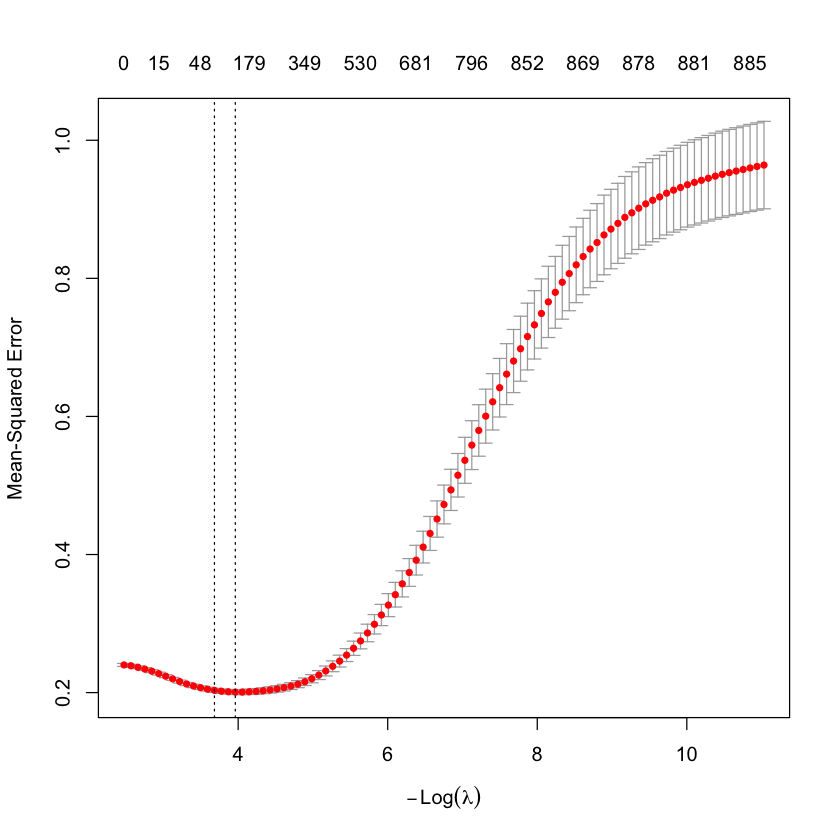

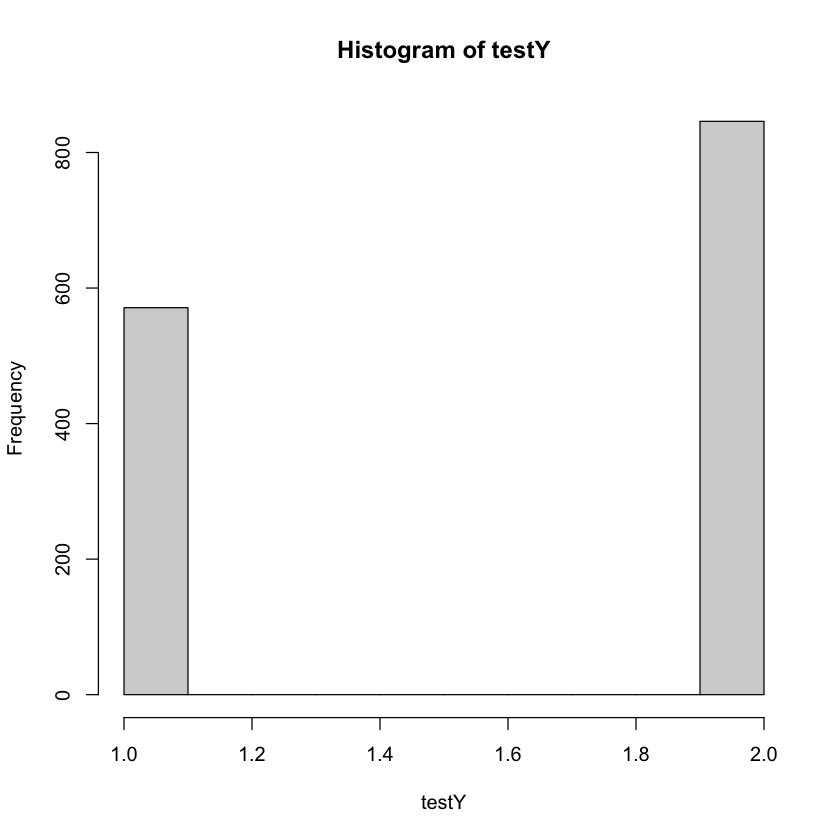

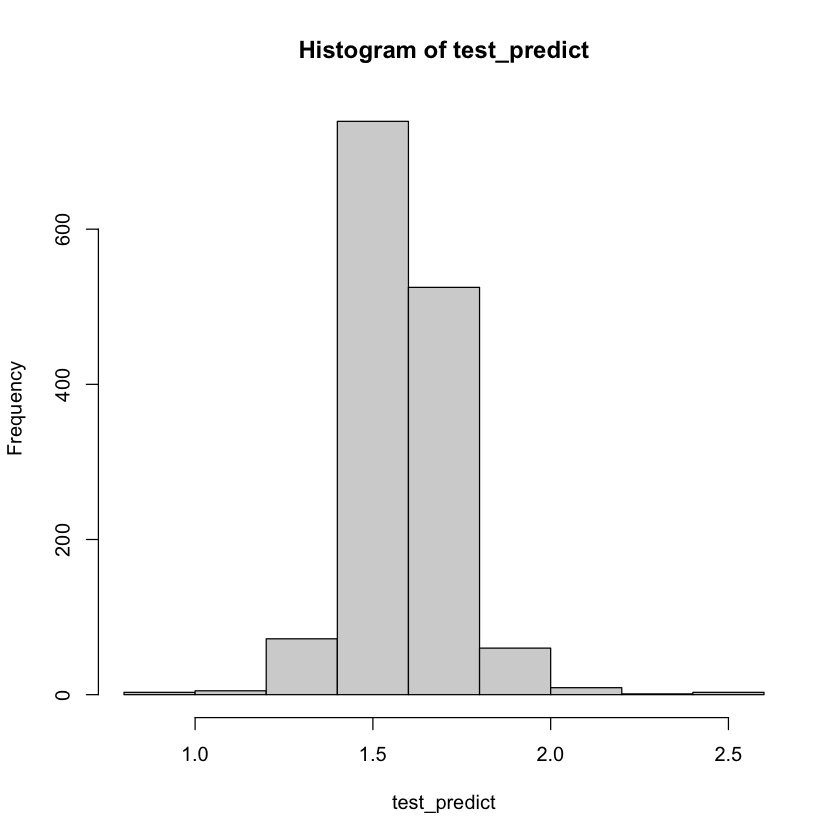

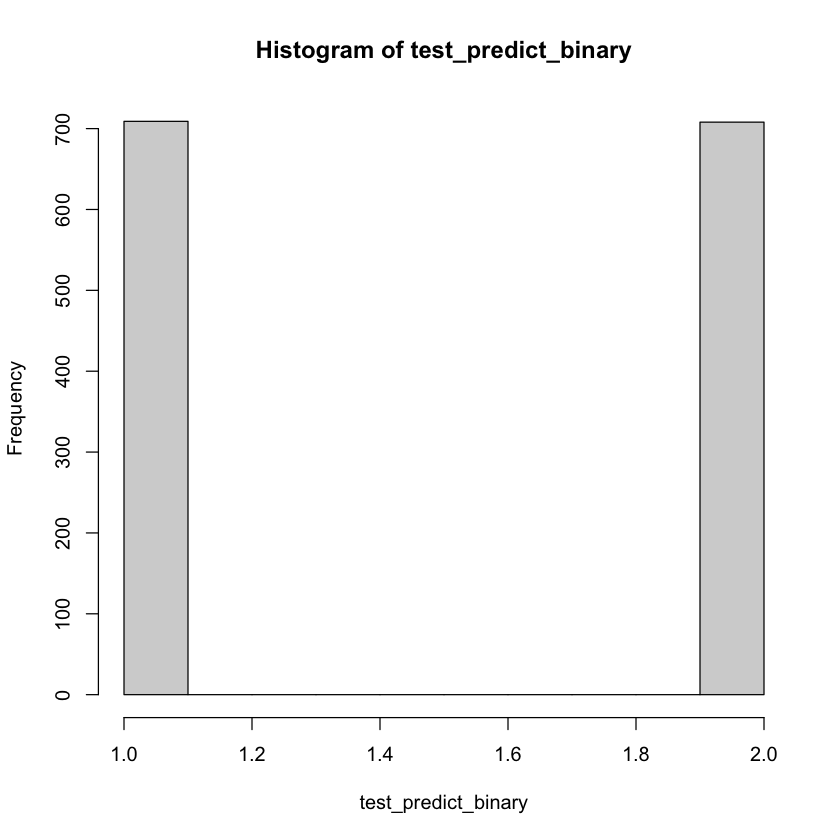

In [ ]:
# First, we need to split the data into training and testing samples
train_split=sample(1:nrow(review_dat),round(nrow(review_dat)/2))

length(train_split)

# create our prediction variables
dfm3<-TAB_dfm(review_dat$text,ngrams=1) %>%
  convert(to="data.frame") %>%
  select(-doc_id)

trainX<-dfm3 %>%
  slice(train_split) %>%
  as.matrix()

trainY<-review_dat %>%
  slice(train_split) %>%
  pull(price)

testX<-dfm3 %>% 
  slice(-train_split) %>%
  as.matrix()

testY<-review_dat %>%
  slice(-train_split) %>%
  pull(price)

# Put training data into LASSO model (note - glmnet requires a matrix)

lasso_model<-cv.glmnet(x=trainX,y=trainY)

# let's plot the cross-validation curve to see if it's finding any signal
plot(lasso_model)

# generate predictions for test data
test_predict<-predict(lasso_model,newx = testX)[,1]

# Note that while the true answers are binary, the predictions are continuous
# Always check these distributions!!
hist(testY)
hist(test_predict)

# For now, let's just split the predictions in two, using the median

test_predict_binary=ifelse(test_predict>median(test_predict),
                           2,
                           1)
hist(test_predict_binary)

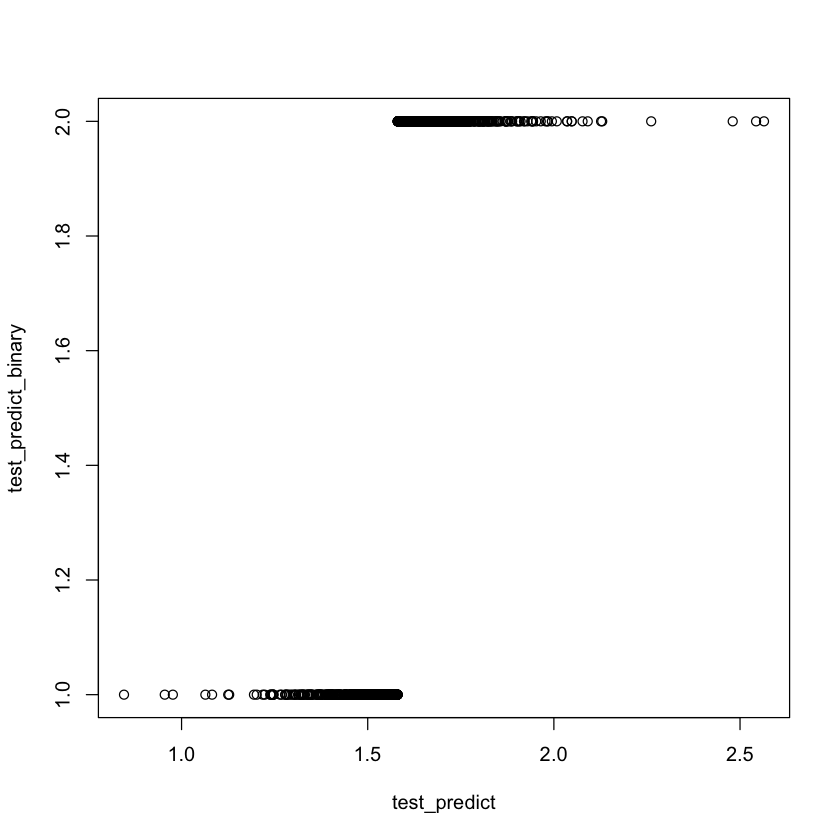

[1] 71.912

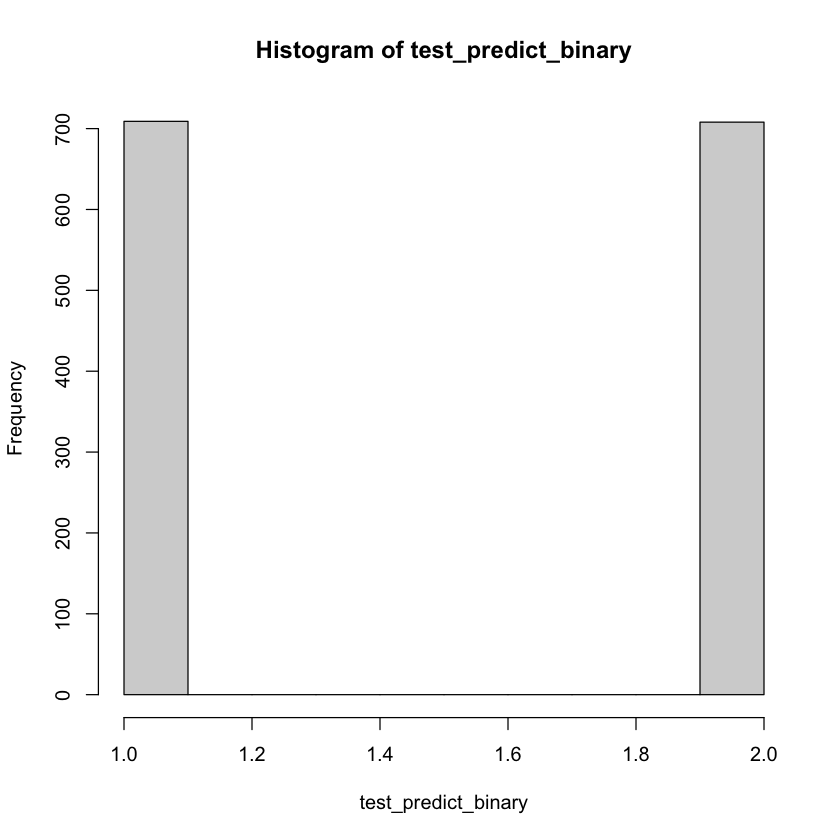

In [235]:
# quick plot of the split to make sure it looks right
plot(x=test_predict,y=test_predict_binary)

# This should have the same values as testY
hist(test_predict_binary)

# We can calculate accuracy from that
round(100*mean(test_predict_binary==testY),3)

In [ ]:
# What is in the model? We can extract the coefficients
# lots of zeros
lasso_model %>%
  coef() %>%
  drop()

# let's get this in a data frame
lasso_model %>%
  coef() %>%
  drop() %>%
  as.data.frame() %>%
  rownames_to_column(var = "ngram") %>%
  rename(score=".")

# just the top
lasso_model %>%
  coef() %>%
  drop() %>%
  as.data.frame() %>%
  rownames_to_column(var = "ngram") %>%
  rename(score=".") %>%
  head(20)

# drop zeros, and save
plotCoefs<-lasso_model %>%
  coef() %>%
  drop() %>%
  as.data.frame() %>%
  rownames_to_column(var = "ngram") %>%
  rename(score=".") %>%
  filter(score!=0 & ngram!="(Intercept)" & !is.na(score))  

plotCoefs

(Intercept)          went     boyfriend        friend          look 
 1.5622147914  0.0022352700  0.0000000000  0.0000000000  0.0000000000 
        place           eat          type       restaur            go 
 0.0000000000  0.0000000000  0.0000000000  0.0164193455  0.0000000000 
        first          date          fact        remind         middl 
 0.0000000000  0.0290882358  0.0000000000  0.0000000000  0.0000000000 
      chipotl        expect         fanci          wait        either 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
         fast          food          much          walk          sure 
-0.0111089789  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
         turn         great           got       chicken          serv 
 0.0000000000  0.0077388920  0.0000000000  0.0000000000  0.0000000000 
         rice         salad          lamb          best         howev 
-0.0107199237  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
         mine          well          back          pita        pretti 
 0.0000000000  0.0000000000  0.0000000000 -0.0627484794  0.0000000000 
        excit          know           one          wrap        delici 
 0.0000000000  0.0000000000  0.0000000000 -0.0093937868  0.0000000000 
          ask          want           hot          sauc         dress 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
         side        becaus    understand      question         never 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
       anyway          said           get          next           tri 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
       medium      although         peopl           use         spici 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0070840585 
       consid       thought       homemad          veri         bland 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
       tomato          like        flavor        pepper         spice 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
         fine          just      complain           sit         bread 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
          fri           oil         grill         fresh          girl 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
       prefer          wing        especi      somewhat       satisfi 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
         feel          sinc       probabl          time        better 
 0.0079465806  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
       compar        french         whole          meal        realli 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
        pizza        chines         chees          sour         cream 
-0.0026331105  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
         high       everyth       perfect         watch          game 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
       greasi          five           guy          door          must 
 0.0000000000  0.0000000000 -0.0140128802  0.0000000000  0.0000000000 
        basic          onli         south           end      unfortun 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
          whi         twice          dish        decent        second 
 0.0000000000  0.0000000000  0.0253697309  0.0000000000  0.0000000000 
       differ         think          good          soup          seen 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
        befor         dumpl         heard          salt        expens 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
        littl         money        season          star           day 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
         come         anot

ngram,score
<chr>,<dbl>
(Intercept),1.562214791
went,0.002235270
boyfriend,0.000000000
friend,0.000000000
look,0.000000000
place,0.000000000
eat,0.000000000
type,0.000000000
restaur,0.016419346


,ngram,score
,<chr>,<dbl>
1,(Intercept),1.56221479
2,went,0.00223527
3,boyfriend,0.00000000
4,friend,0.00000000
5,look,0.00000000
6,place,0.00000000
7,eat,0.00000000
8,type,0.00000000
9,restaur,0.01641935


ngram,score
<chr>,<dbl>
went,0.0022352700
restaur,0.0164193455
date,0.0290882358
fast,-0.0111089789
great,0.0077388920
rice,-0.0107199237
pita,-0.0627484794
wrap,-0.0093937868
spici,0.0070840585


Joining with `by = join_by(ngram)`


,ngram,score,freq
,<chr>,<dbl>,<dbl>
1,went,0.002,0.130
2,restaur,0.016,0.205
3,date,0.029,0.020
4,fast,-0.011,0.055
5,great,0.008,0.410
6,rice,-0.011,0.123


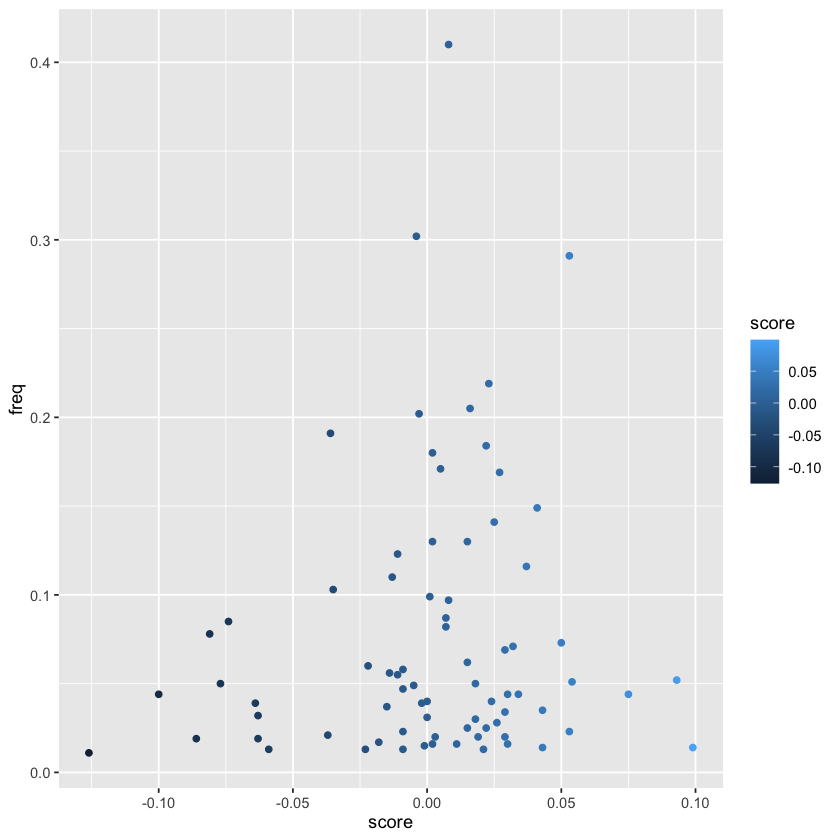

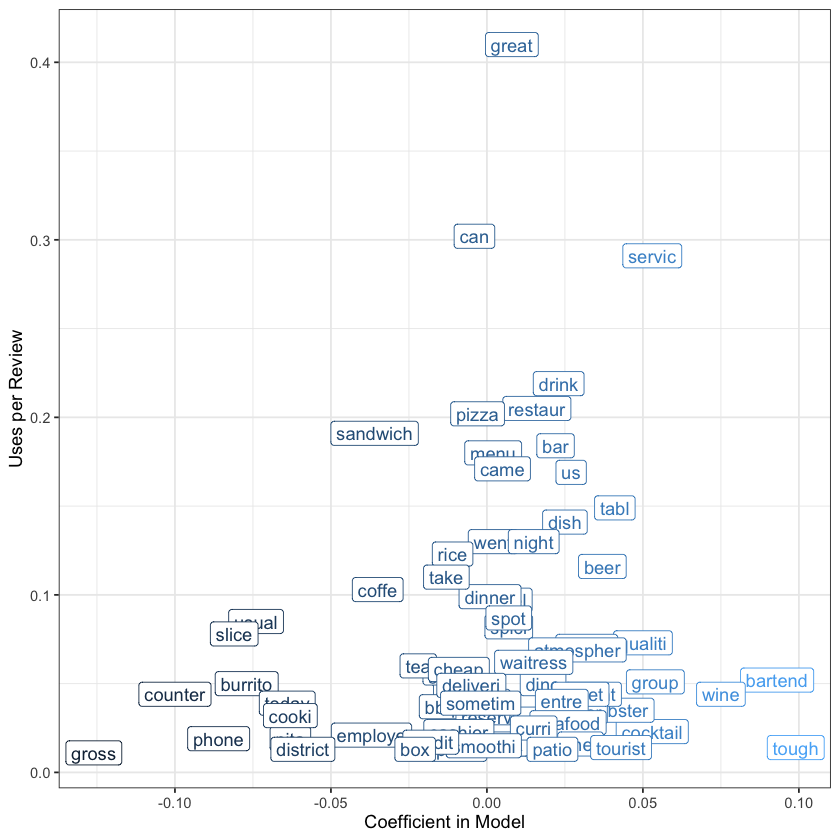

In [237]:
# create a similar data frame with ngram frequencies
plotFreqs<-data.frame(ngram=colnames(trainX),
                      freq=colMeans(trainX))


# combine data, round for easy reading
plotDat<-plotCoefs %>%
  left_join(plotFreqs) %>%
  mutate_at(vars(score,freq),~round(.,3))

head(plotDat)

# here's our first plot, with minimal customization
plotDat %>%
  ggplot(aes(x=score,y=freq,label=ngram,color=score)) +
  geom_point()

# Problems:
# Bad axis labels
# no point labels
# I don't like the default grey background
# legend is redundant

plotDat %>%
  ggplot(aes(x=score,y=freq,label=ngram,color=score)) +
  geom_point() +
  geom_label() +
  theme_bw() +
  labs(x="Coefficient in Model",y="Uses per Review")+
  theme(legend.position = "none")

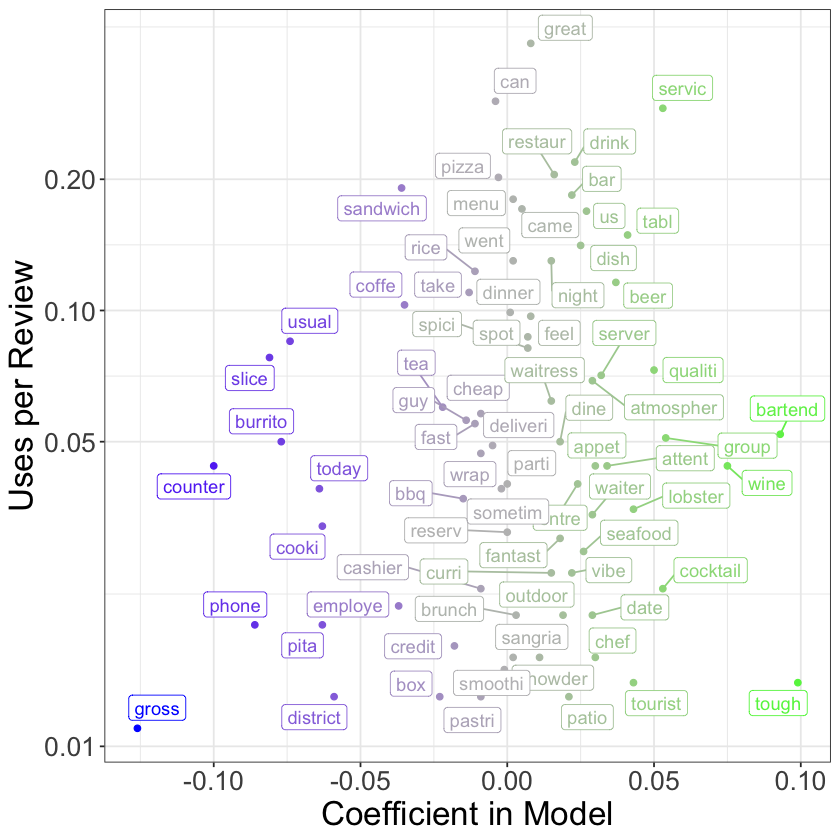

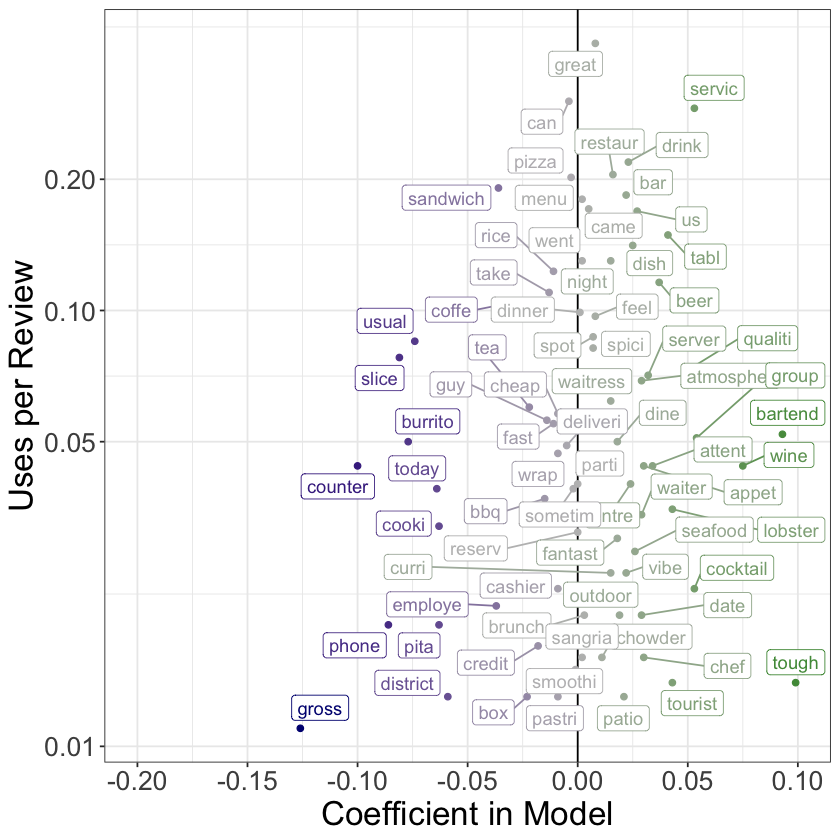

In [238]:
# More problems:
# wasted space in Y axis
# lots of overlapping labels
# small axis labels
# i don't like the default colors

# colors we can set manually

plotDat %>%
  ggplot(aes(x=score,y=freq,label=ngram,color=score)) +
  scale_color_gradient2(low="blue",
                        mid = "grey",
                        high="green",
                        midpoint = 0)+
  geom_point() +
  geom_label_repel()+  
  scale_y_continuous(trans="log2",
                     breaks=c(.01,.05,.1,.2,.5,1,2,5))+
  theme_bw() +
  labs(x="Coefficient in Model",y="Uses per Review")+
  theme(legend.position = "none",
        axis.title=element_text(size=20),
        axis.text=element_text(size=16))

# let's get more words on the plot
# also make the X axis clearer
# use darker colors

plotDat %>%
  ggplot(aes(x=score,y=freq,label=ngram,color=score)) +
  scale_color_gradient2(low="navyblue",
                        mid = "grey",
                        high="forestgreen",
                        midpoint = 0)+
  geom_vline(xintercept=0)+
  geom_point() +
  geom_label_repel(max.overlaps = 15)+  
  scale_x_continuous(limits = c(-.2,.1),
                     breaks = seq(-.2,.2,.05)) +
  scale_y_continuous(trans="log2",
                     breaks=c(.01,.05,.1,.2,.5,1,2,5))+
  theme_bw() +
  labs(x="Coefficient in Model",y="Uses per Review")+
  theme(legend.position = "none",
        axis.title=element_text(size=20),
        axis.text=element_text(size=16))

### Predicting Stars

In [239]:
table(review_dat$stars)


   2    4 
 824 2011 

In [242]:
# A simple start - correlate each word with star rating

correlationss<-dfm3 %>%
  summarise_all(~round(cor(.,review_dat$stars),3)) %>%
  unlist()

# Ten lowest associations
sort(correlationss)[1:10]

# Ten highest associations
rev(sort(correlationss))[1:10]

mediocr disappoint        ask      bland      minut    terribl         ok 
    -0.185     -0.176     -0.160     -0.154     -0.150     -0.148     -0.144 
       bad       took      worst 
    -0.140     -0.139     -0.139

great  delici perfect definit    love   tasti favorit   yummi    amaz    good 
  0.184   0.170   0.156   0.121   0.120   0.117   0.109   0.100   0.097   0.091

[1] 1418

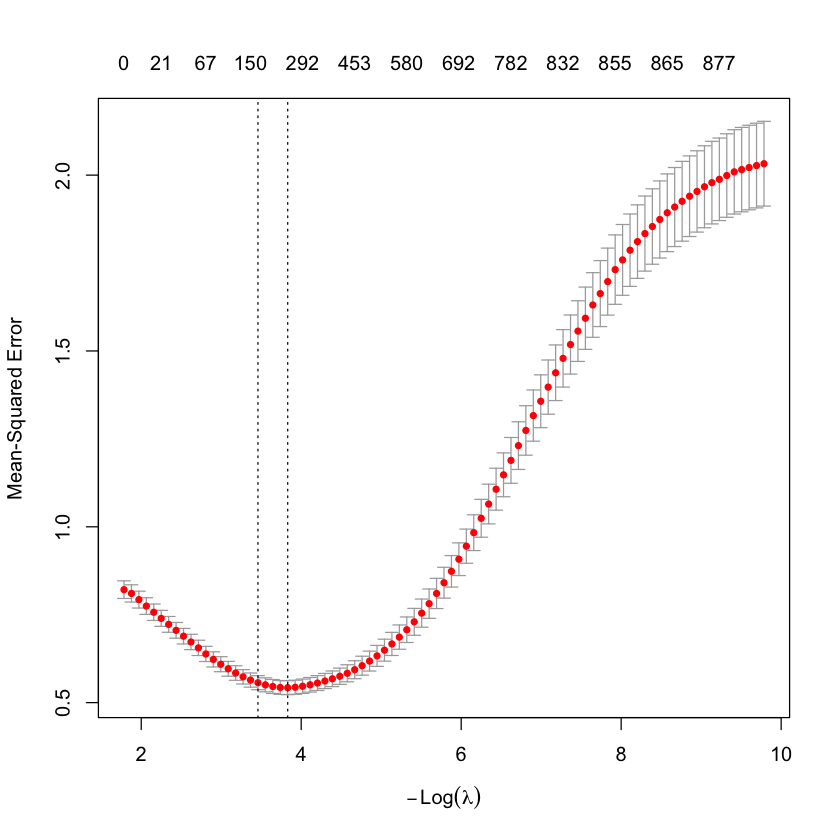

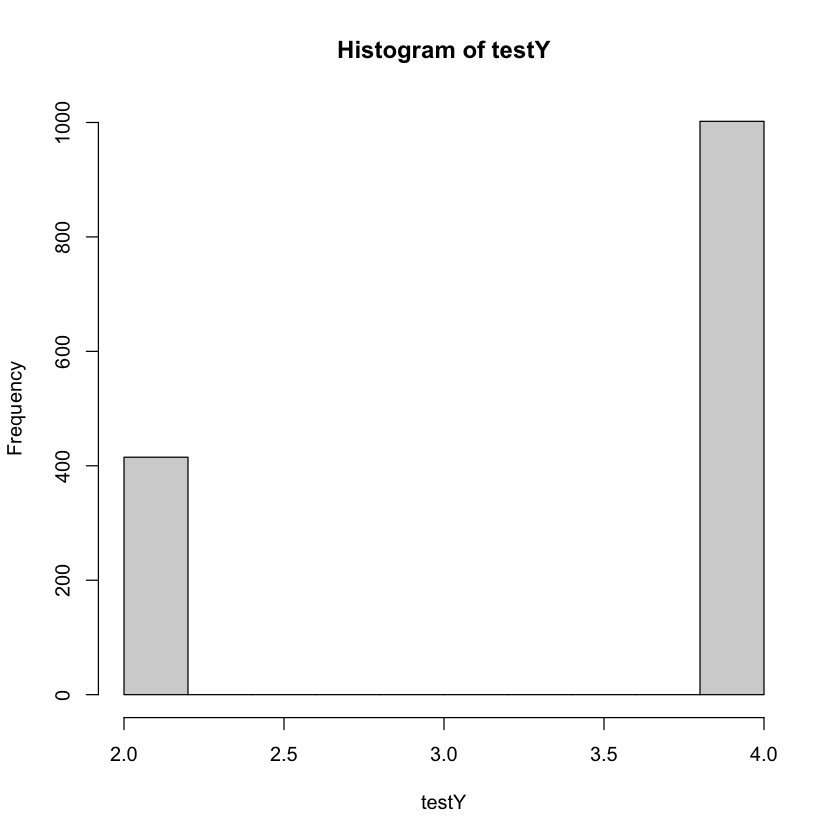

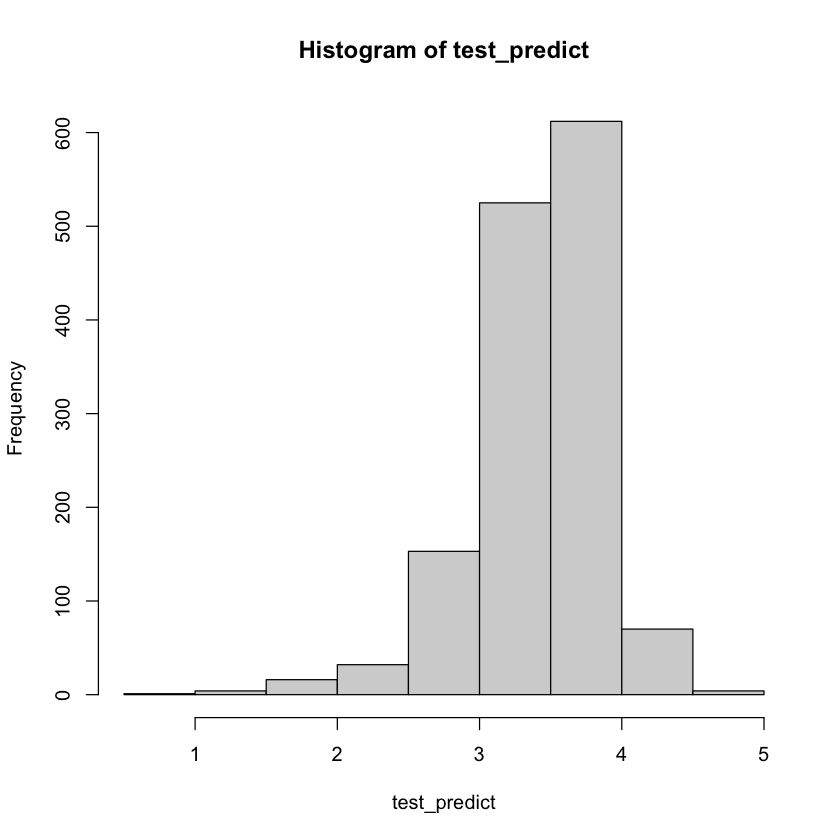

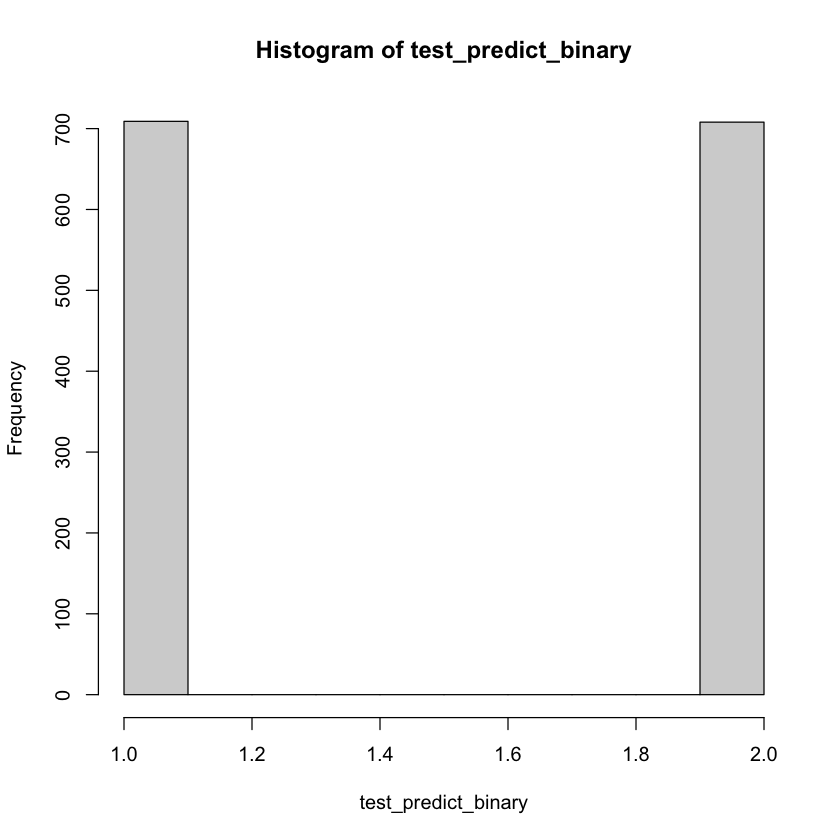

In [243]:
# First, we need to split the data into training and testing samples
train_split=sample(1:nrow(review_dat),round(nrow(review_dat)/2))

length(train_split)

# create our prediction variables
dfm3<-TAB_dfm(review_dat$text,ngrams=1) %>%
  convert(to="data.frame") %>%
  select(-doc_id)

trainX<-dfm3 %>%
  slice(train_split) %>%
  as.matrix()

trainY<-review_dat %>%
  slice(train_split) %>%
  pull(stars)

testX<-dfm3 %>% 
  slice(-train_split) %>%
  as.matrix()

testY<-review_dat %>%
  slice(-train_split) %>%
  pull(stars)

# Put training data into LASSO model (note - glmnet requires a matrix)

lasso_model<-cv.glmnet(x=trainX,y=trainY)

# let's plot the cross-validation curve to see if it's finding any signal
plot(lasso_model)

# generate predictions for test data
test_predict<-predict(lasso_model,newx = testX)[,1]

# Note that while the true answers are binary, the predictions are continuous
# Always check these distributions!!
hist(testY)
hist(test_predict)

# For now, let's just split the predictions in two, using the median

test_predict_binary=ifelse(test_predict>median(test_predict),
                           2,
                           1)
hist(test_predict_binary)

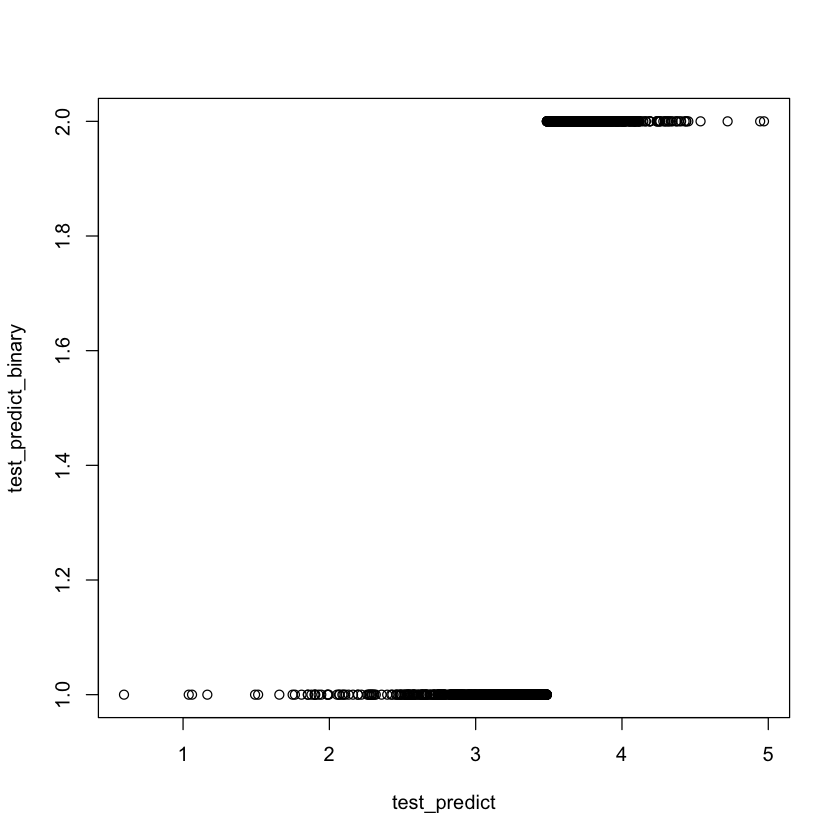

[1] 2.329

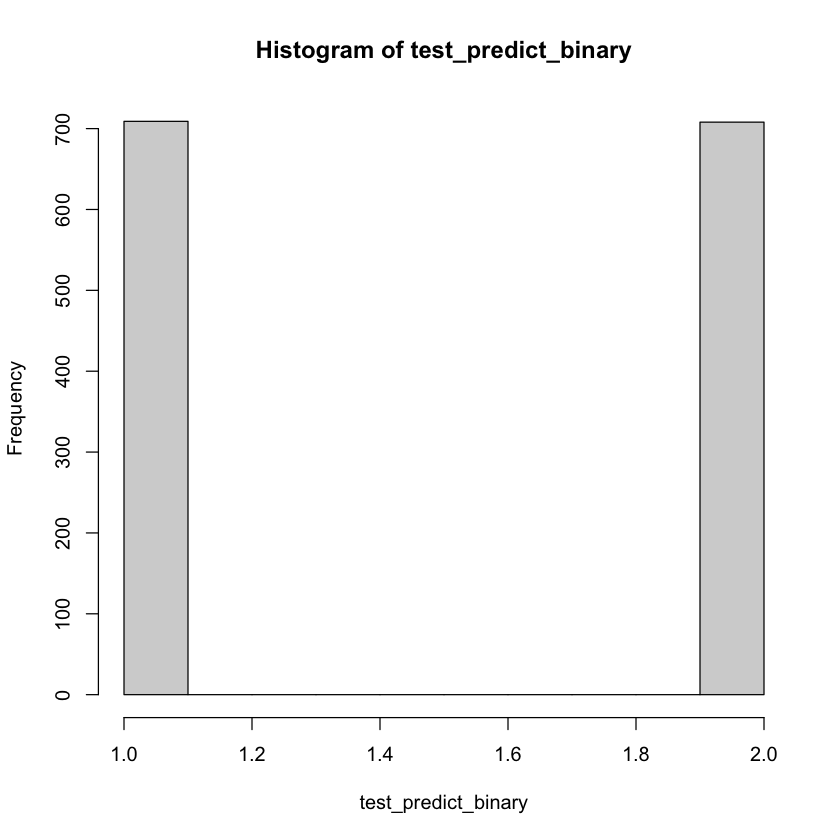

In [244]:
# quick plot of the split to make sure it looks right
plot(x=test_predict,y=test_predict_binary)

# This should have the same values as testY
hist(test_predict_binary)

# We can calculate accuracy from that
round(100*mean(test_predict_binary==testY),3)

In [245]:
# What is in the model? We can extract the coefficients
# lots of zeros
lasso_model %>%
  coef() %>%
  drop()

# let's get this in a data frame
lasso_model %>%
  coef() %>%
  drop() %>%
  as.data.frame() %>%
  rownames_to_column(var = "ngram") %>%
  rename(score=".")

# just the top
lasso_model %>%
  coef() %>%
  drop() %>%
  as.data.frame() %>%
  rownames_to_column(var = "ngram") %>%
  rename(score=".") %>%
  head(20)

# drop zeros, and save
plotCoefs<-lasso_model %>%
  coef() %>%
  drop() %>%
  as.data.frame() %>%
  rownames_to_column(var = "ngram") %>%
  rename(score=".") %>%
  filter(score!=0 & ngram!="(Intercept)" & !is.na(score))  

plotCoefs

(Intercept)          went     boyfriend        friend          look 
 3.4026061085  0.0000000000  0.0000000000  0.0501948175  0.0000000000 
        place           eat          type       restaur            go 
 0.0000000000 -0.0398115219  0.0000000000  0.0000000000  0.0000000000 
        first          date          fact        remind         middl 
 0.0000000000  0.0054879598  0.0000000000 -0.2029624874  0.0000000000 
      chipotl        expect         fanci          wait        either 
 0.0000000000  0.0000000000  0.0000000000 -0.0519388542  0.0000000000 
         fast          food          much          walk          sure 
 0.0095253338  0.0000000000 -0.0215049633  0.0000000000  0.0000000000 
         turn         great           got       chicken          serv 
-0.0085223904  0.0957827066  0.0000000000  0.0000000000  0.0000000000 
         rice         salad          lamb          best         howev 
 0.0000000000  0.0000000000  0.0558501320  0.0236566570  0.0000000000 
         mine          well          back          pita        pretti 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
        excit          know           one          wrap        delici 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.1865127840 
          ask          want           hot          sauc         dress 
-0.0906933347  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
         side        becaus    understand      question         never 
 0.0000000000  0.0000000000 -0.1103837566  0.0000000000  0.0000000000 
       anyway          said           get          next           tri 
 0.0000000000 -0.0344663975  0.0000000000  0.0000000000  0.0338920112 
       medium      although         peopl           use         spici 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.1100688943 
       consid       thought       homemad          veri         bland 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000 -0.1317529606 
       tomato          like        flavor        pepper         spice 
 0.0000000000  0.0000000000  0.0125210528  0.0000000000  0.0000000000 
         fine          just      complain           sit         bread 
-0.0081153389 -0.0290659020  0.0000000000  0.0000000000  0.0000000000 
          fri           oil         grill         fresh          girl 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
       prefer          wing        especi      somewhat       satisfi 
 0.0000000000  0.0000000000  0.0019174203  0.0000000000  0.0228937472 
         feel          sinc       probabl          time        better 
 0.0000000000  0.0000000000  0.0035419634  0.0000000000  0.0000000000 
       compar        french         whole          meal        realli 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0338407825 
        pizza        chines         chees          sour         cream 
 0.0000000000  0.0085374967 -0.0060820169  0.0000000000  0.0000000000 
         high       everyth       perfect         watch          game 
 0.0000000000  0.0000000000  0.1523378925  0.0000000000  0.0000000000 
       greasi          five           guy          door          must 
-0.0094113089  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
        basic          onli         south           end      unfortun 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000 -0.2700837052 
          whi         twice          dish        decent        second 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
       differ         think          good          soup          seen 
 0.0000000000  0.0000000000  0.0500583794  0.0000000000  0.0000000000 
        befor         dumpl         heard          salt        expens 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
        littl         money        season          star           day 
 0.0635219606 -0.0601000219  0.0000000000  0.0000000000  0.0000000000 
         come         anot

ngram,score
<chr>,<dbl>
(Intercept),3.402606108
went,0.000000000
boyfriend,0.000000000
friend,0.050194817
look,0.000000000
place,0.000000000
eat,-0.039811522
type,0.000000000
restaur,0.000000000


,ngram,score
,<chr>,<dbl>
1,(Intercept),3.40260611
2,went,0.00000000
3,boyfriend,0.00000000
4,friend,0.05019482
5,look,0.00000000
6,place,0.00000000
7,eat,-0.03981152
8,type,0.00000000
9,restaur,0.00000000


ngram,score
<chr>,<dbl>
friend,0.050194817
eat,-0.039811522
date,0.005487960
remind,-0.202962487
wait,-0.051938854
fast,0.009525334
much,-0.021504963
turn,-0.008522390
great,0.095782707


Warning message:
“ggrepel: 127 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_label_repel()`).”
Warning message:
“ggrepel: 24 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 120 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


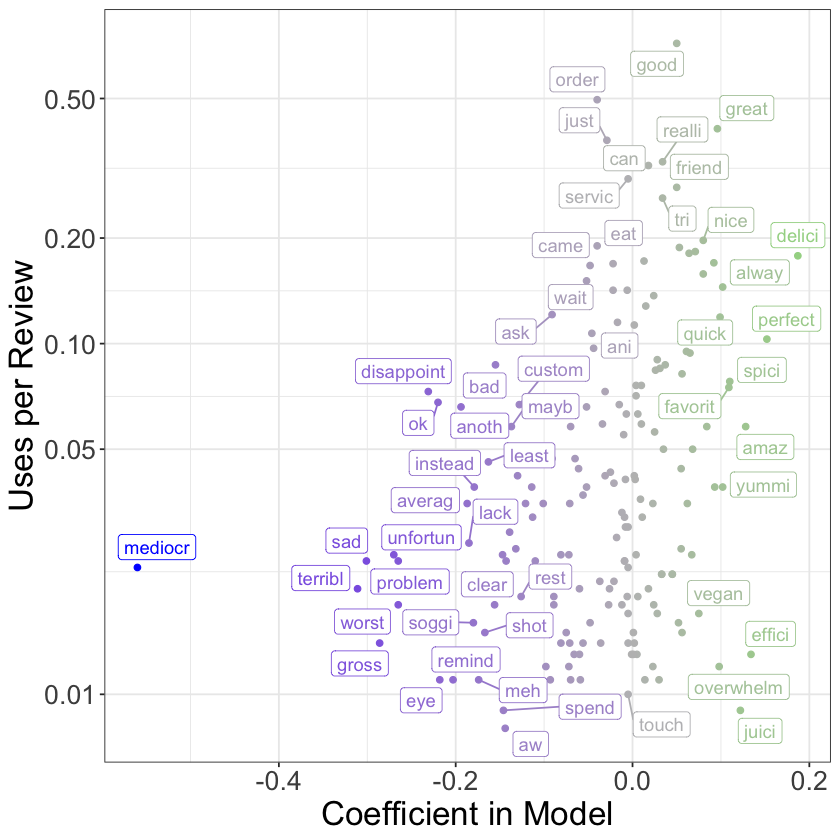

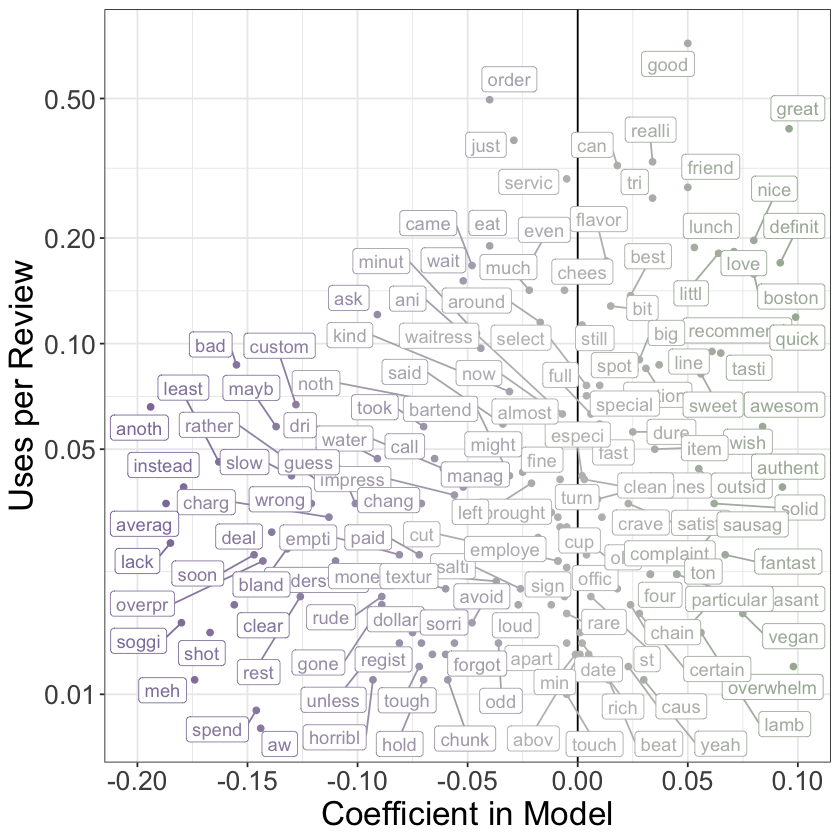

In [263]:
# Visualisation

plotDat %>%
  ggplot(aes(x=score,y=freq,label=ngram,color=score)) +
  scale_color_gradient2(low="blue",
                        mid = "grey",
                        high="green",
                        midpoint = 0)+
  geom_point() +
  geom_label_repel()+  
  scale_y_continuous(trans="log2",
                     breaks=c(.01,.05,.1,.2,.5,1,2,5))+
  theme_bw() +
  labs(x="Coefficient in Model",y="Uses per Review")+
  theme(legend.position = "none",
        axis.title=element_text(size=20),
        axis.text=element_text(size=16))

# let's get more words on the plot
# also make the X axis clearer
# use darker colors

plotDat %>%
  ggplot(aes(x=score,y=freq,label=ngram,color=score)) +
  scale_color_gradient2(low="navyblue",
                        mid = "grey",
                        high="forestgreen",
                        midpoint = 0)+
  geom_vline(xintercept=0)+
  geom_point() +
  geom_label_repel(max.overlaps = 15)+  
  scale_x_continuous(limits = c(-.2,.1),
                     breaks = seq(-.2,.2,.05)) +
  scale_y_continuous(trans="log2",
                     breaks=c(.01,.05,.1,.2,.5,1,2,5))+
  theme_bw() +
  labs(x="Coefficient in Model",y="Uses per Review")+
  theme(legend.position = "none",
        axis.title=element_text(size=20),
        axis.text=element_text(size=16))

### Predicting Gender

[1] 0 1 0 0 0 1

delici      love     yummi    friend   husband boyfriend     super       got 
   -0.121    -0.113    -0.105    -0.093    -0.088    -0.080    -0.076    -0.074 
     wish      cute 
   -0.074    -0.074

wife  boston   solid    fair    buck qualiti    wors     tap      la    valu 
  0.107   0.071   0.067   0.066   0.063   0.063   0.062   0.058   0.055   0.052

[1] 1418

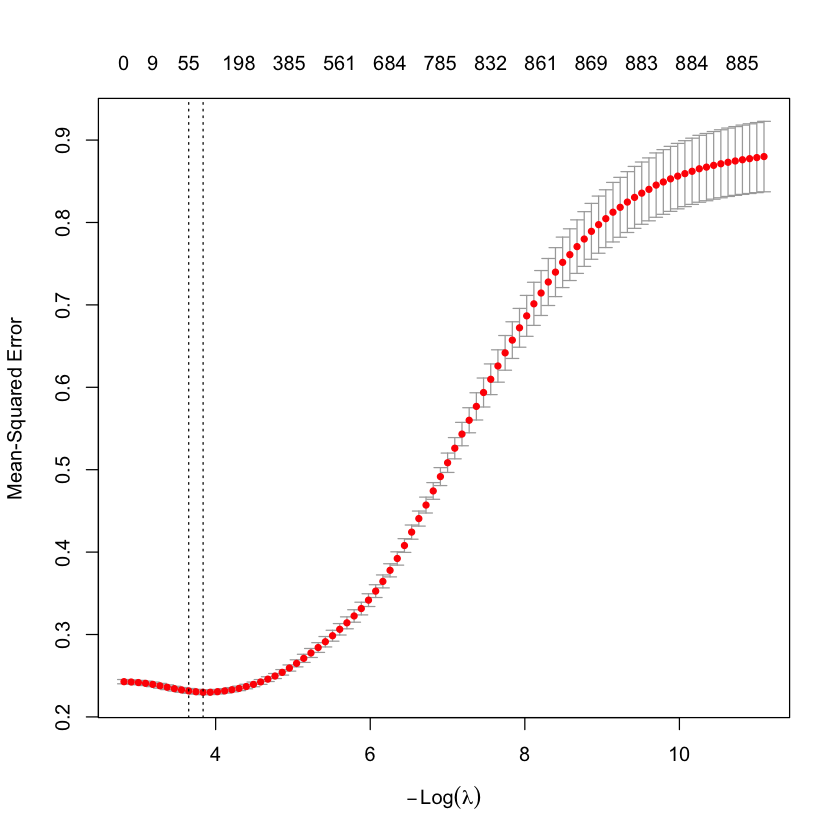

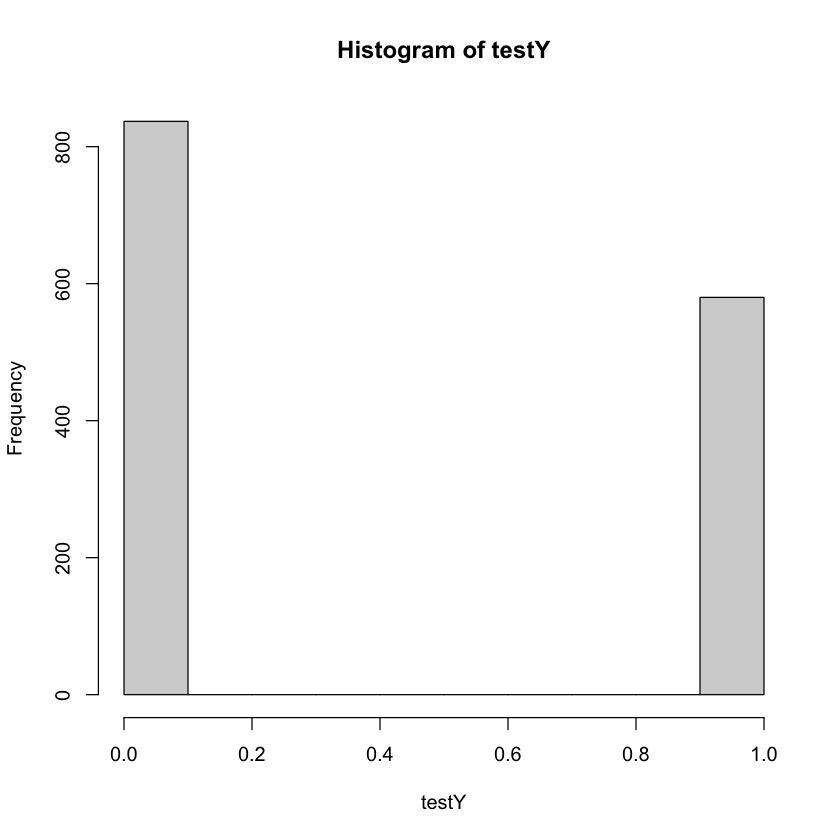

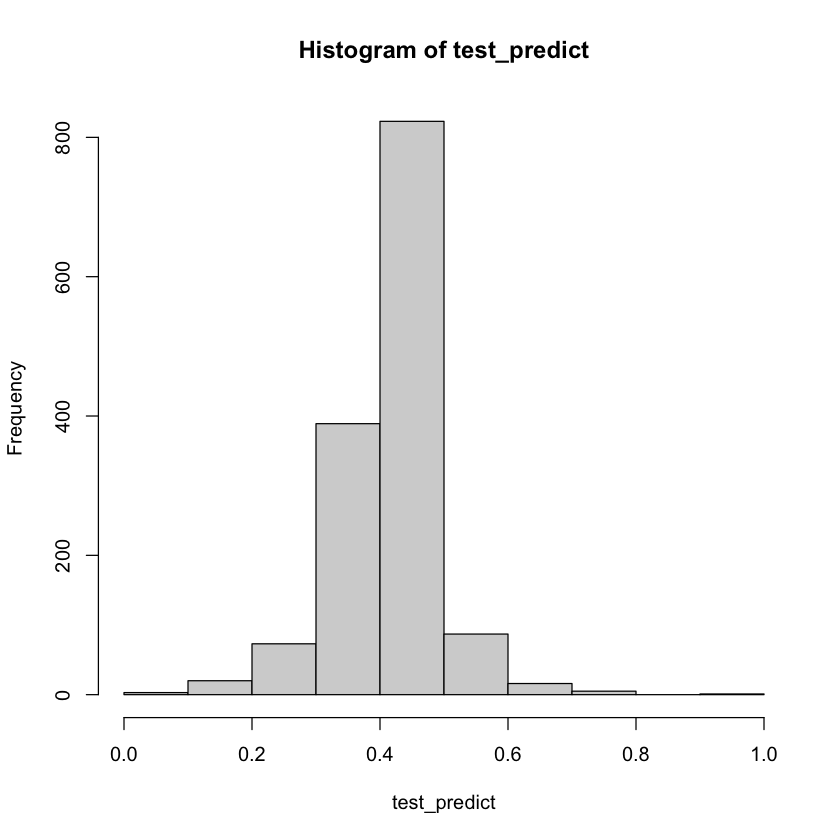

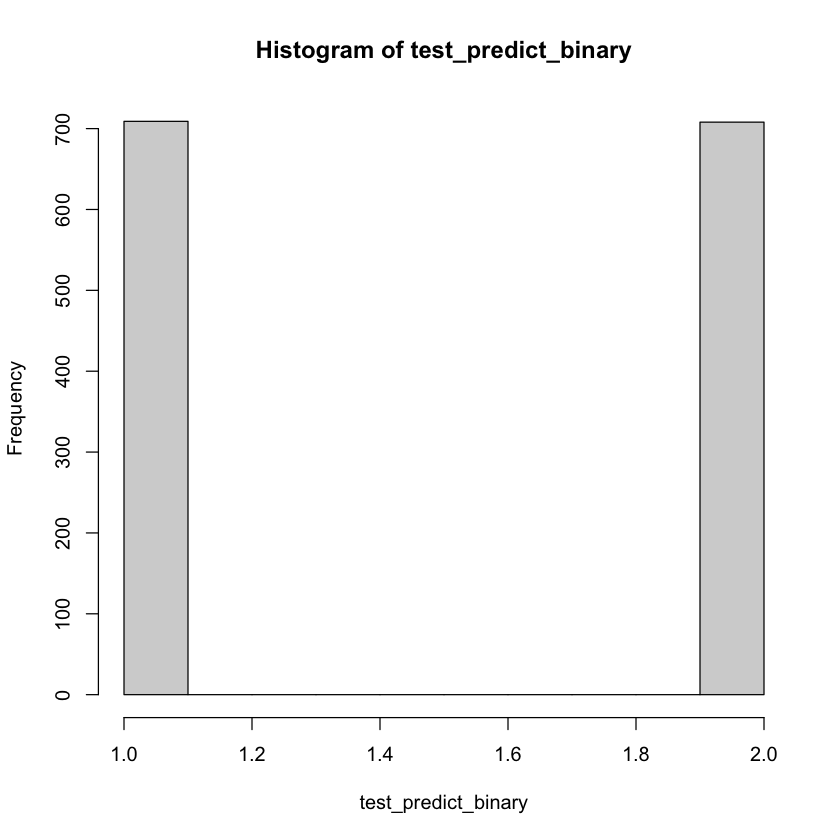

In [259]:
head(review_dat$male)

# A simple start - correlate each word with star rating

correlationss<-dfm3 %>%
  summarise_all(~round(cor(.,review_dat$male),3)) %>%
  unlist()

# Ten lowest associations
sort(correlationss)[1:10]

# Ten highest associations
rev(sort(correlationss))[1:10]

# First, we need to split the data into training and testing samples
train_split=sample(1:nrow(review_dat),round(nrow(review_dat)/2))

length(train_split)

# create our prediction variables
dfm3<-TAB_dfm(review_dat$text,ngrams=1) %>%
  convert(to="data.frame") %>%
  select(-doc_id)

trainX<-dfm3 %>%
  slice(train_split) %>%
  as.matrix()

trainY<-review_dat %>%
  slice(train_split) %>%
  pull(male)

testX<-dfm3 %>% 
  slice(-train_split) %>%
  as.matrix()

testY<-review_dat %>%
  slice(-train_split) %>%
  pull(male)

# Put training data into LASSO model (note - glmnet requires a matrix)

lasso_model<-cv.glmnet(x=trainX,y=trainY)

# let's plot the cross-validation curve to see if it's finding any signal
plot(lasso_model)

# generate predictions for test data
test_predict<-predict(lasso_model,newx = testX)[,1]

# Note that while the true answers are binary, the predictions are continuous
# Always check these distributions!!
hist(testY)
hist(test_predict)

# For now, let's just split the predictions in two, using the median

test_predict_binary=ifelse(test_predict>median(test_predict),
                           2,
                           1)
hist(test_predict_binary)


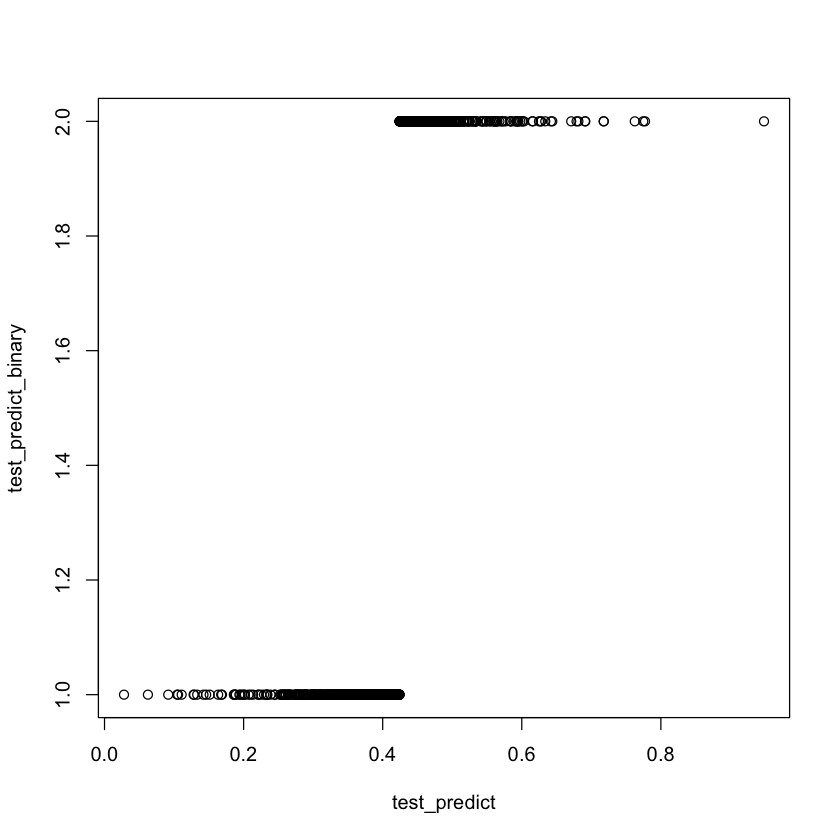

[1] 17.219

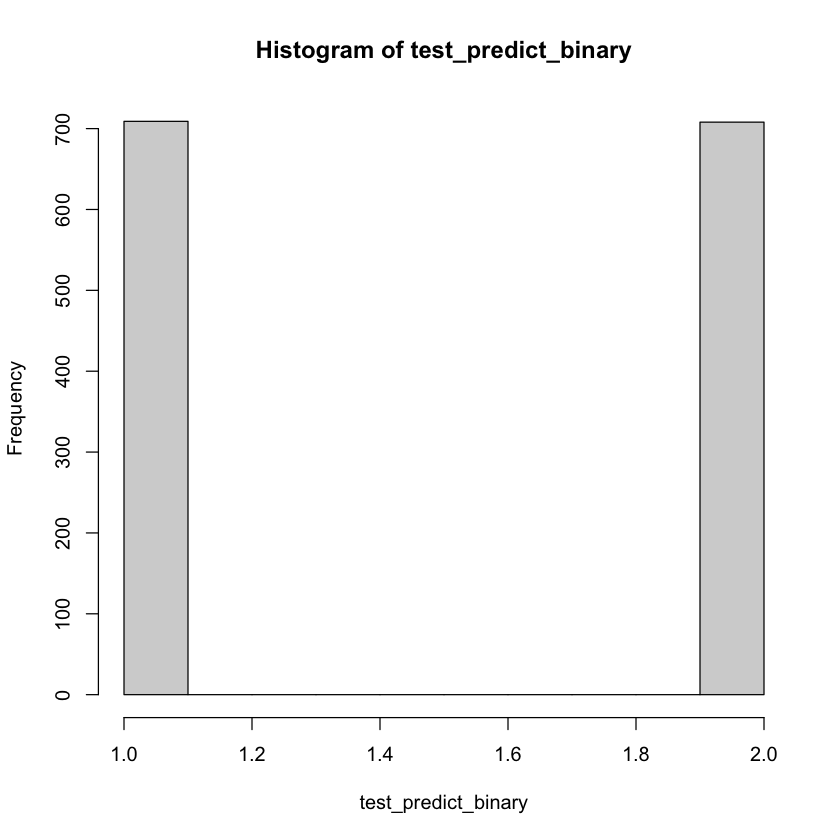

In [261]:
# quick plot of the split to make sure it looks right
plot(x=test_predict,y=test_predict_binary)

# This should have the same values as testY
hist(test_predict_binary)

# We can calculate accuracy from that
round(100*mean(test_predict_binary==testY),3)

In [260]:
# What is in the model? We can extract the coefficients
# lots of zeros
lasso_model %>%
  coef() %>%
  drop()

# let's get this in a data frame
lasso_model %>%
  coef() %>%
  drop() %>%
  as.data.frame() %>%
  rownames_to_column(var = "ngram") %>%
  rename(score=".")

# just the top
lasso_model %>%
  coef() %>%
  drop() %>%
  as.data.frame() %>%
  rownames_to_column(var = "ngram") %>%
  rename(score=".") %>%
  head(20)

# drop zeros, and save
plotCoefs<-lasso_model %>%
  coef() %>%
  drop() %>%
  as.data.frame() %>%
  rownames_to_column(var = "ngram") %>%
  rename(score=".") %>%
  filter(score!=0 & ngram!="(Intercept)" & !is.na(score))  

plotCoefs

(Intercept)          went     boyfriend        friend          look 
 4.448560e-01  0.000000e+00 -3.748440e-02  0.000000e+00  0.000000e+00 
        place           eat          type       restaur            go 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -8.799247e-03 
        first          date          fact        remind         middl 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
      chipotl        expect         fanci          wait        either 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
         fast          food          much          walk          sure 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
         turn         great           got       chicken          serv 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  5.815796e-03 
         rice         salad          lamb          best         howev 
 0.000000e+00 -2.036773e-02  0.000000e+00  0.000000e+00  0.000000e+00 
         mine          well          back          pita        pretti 
 0.000000e+00  0.000000e+00 -4.063324e-03  0.000000e+00  0.000000e+00 
        excit          know           one          wrap        delici 
 0.000000e+00  0.000000e+00 -1.242004e-02  0.000000e+00 -5.339608e-02 
          ask          want           hot          sauc         dress 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
         side        becaus    understand      question         never 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
       anyway          said           get          next           tri 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
       medium      although         peopl           use         spici 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
       consid       thought       homemad          veri         bland 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
       tomato          like        flavor        pepper         spice 
 0.000000e+00  0.000000e+00 -8.562978e-03  0.000000e+00  0.000000e+00 
         fine          just      complain           sit         bread 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
          fri           oil         grill         fresh          girl 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
       prefer          wing        especi      somewhat       satisfi 
 0.000000e+00  0.000000e+00  7.193949e-04  0.000000e+00  0.000000e+00 
         feel          sinc       probabl          time        better 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
       compar        french         whole          meal        realli 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
        pizza        chines         chees          sour         cream 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
         high       everyth       perfect         watch          game 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
       greasi          five           guy          door          must 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
        basic          onli         south           end      unfortun 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
          whi         twice          dish        decent        second 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
       differ         think          good          soup          seen 
 0.000000e+00  0.000000e+00  0.000000e+00 -7.927817e-03  0.000000e+00 
        befor         dumpl         heard          salt        expens 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -2.087977e-02 
        littl         money        season          star           day 
 0.000000e+00  1.160874e-02 -2.133127e-02  0.000000e+00  0.000000e+00 
         come         anot

ngram,score
<chr>,<dbl>
(Intercept),0.444856030
went,0.000000000
boyfriend,-0.037484401
friend,0.000000000
look,0.000000000
place,0.000000000
eat,0.000000000
type,0.000000000
restaur,0.000000000


,ngram,score
,<chr>,<dbl>
1,(Intercept),0.444856030
2,went,0.000000000
3,boyfriend,-0.037484401
4,friend,0.000000000
5,look,0.000000000
6,place,0.000000000
7,eat,0.000000000
8,type,0.000000000
9,restaur,0.000000000


ngram,score
<chr>,<dbl>
boyfriend,-3.748440e-02
go,-8.799247e-03
serv,5.815796e-03
salad,-2.036773e-02
back,-4.063324e-03
one,-1.242004e-02
delici,-5.339608e-02
flavor,-8.562978e-03
especi,7.193949e-04


Warning message:
“ggrepel: 127 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_label_repel()`).”
Warning message:
“ggrepel: 24 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 120 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


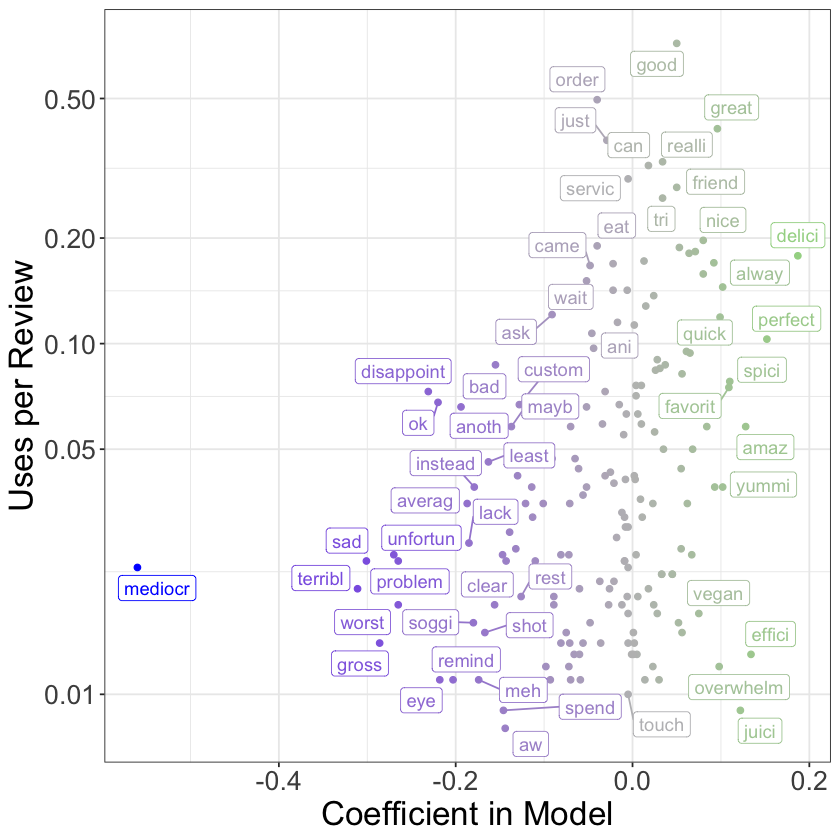

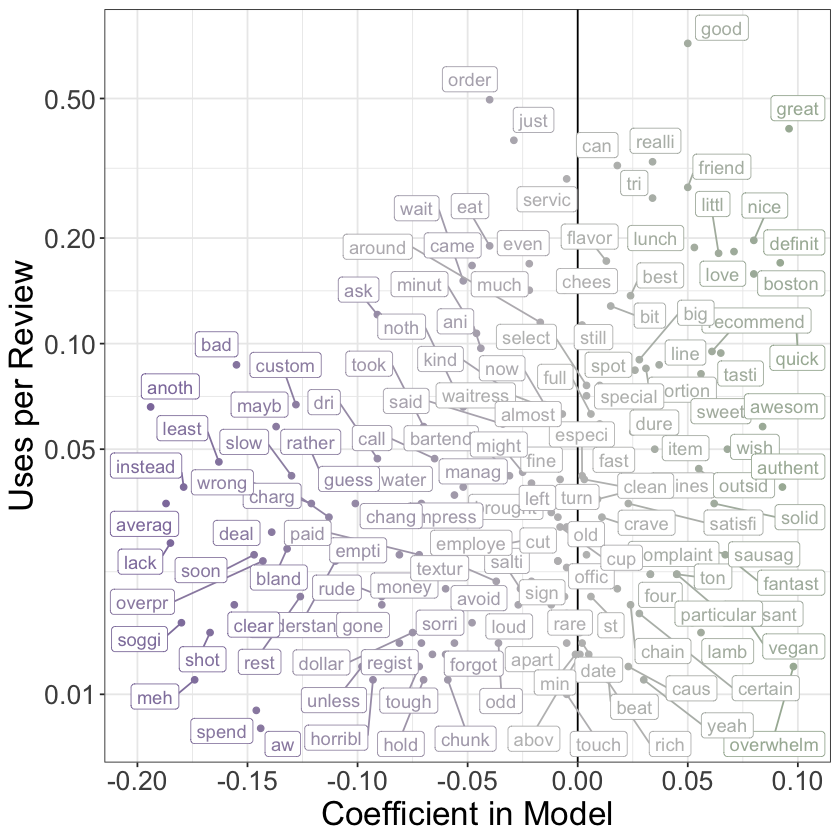

In [262]:
# Colour Visualisation
plotDat %>%
  ggplot(aes(x=score,y=freq,label=ngram,color=score)) +
  scale_color_gradient2(low="blue",
                        mid = "grey",
                        high="green",
                        midpoint = 0)+
  geom_point() +
  geom_label_repel()+  
  scale_y_continuous(trans="log2",
                     breaks=c(.01,.05,.1,.2,.5,1,2,5))+
  theme_bw() +
  labs(x="Coefficient in Model",y="Uses per Review")+
  theme(legend.position = "none",
        axis.title=element_text(size=20),
        axis.text=element_text(size=16))

# let's get more words on the plot
# also make the X axis clearer
# use darker colors

plotDat %>%
  ggplot(aes(x=score,y=freq,label=ngram,color=score)) +
  scale_color_gradient2(low="navyblue",
                        mid = "grey",
                        high="forestgreen",
                        midpoint = 0)+
  geom_vline(xintercept=0)+
  geom_point() +
  geom_label_repel(max.overlaps = 15)+  
  scale_x_continuous(limits = c(-.2,.1),
                     breaks = seq(-.2,.2,.05)) +
  scale_y_continuous(trans="log2",
                     breaks=c(.01,.05,.1,.2,.5,1,2,5))+
  theme_bw() +
  labs(x="Coefficient in Model",y="Uses per Review")+
  theme(legend.position = "none",
        axis.title=element_text(size=20),
        axis.text=element_text(size=16))